# External modules

In [115]:
options(tidyverse.quiet = TRUE)
options(caret.quiet = TRUE)
options(Hmisc.quiet = TRUE)
options(vroom.quiet = TRUE)

In [133]:
library(tidyverse)
library(readr)
library(DescTools)
library(Hmisc)

# Internal functions

In [137]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/read_data.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/load_functions.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/make_models.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/transform_data.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/calculate_model_aic.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/save_multiple_model_aic.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/extract_multiple_model_aic.R"))


In [4]:
# path <- ".."
#
# xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
# xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
# xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
# xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
# xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
# xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
# xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
# xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
# xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
# xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
# xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
# xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
# xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
# xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
# xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
# xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
# xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
# xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))

In [5]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [6]:
data_path <- "./04_experimentation_01/merged_data.csv"

data <- xfun::in_dir(dir = path, expr = read_data(data_path))

In [7]:
str(data)

'data.frame':	22846 obs. of  52 variables:
 $ timestamp            : int  17241310 17274219 17308103 17343083 17374951 17408808 17440764 17474667 17508571 17608320 ...
 $ latitude             : num  48.8 48.8 48.8 48.8 48.8 ...
 $ longitude            : num  2.46 2.46 2.46 2.46 2.46 ...
 $ lateral_error        : num  -0.571 -0.566 -0.56 -0.592 -0.57 ...
 $ longitudinal_error   : num  0.0775 0.0832 0.0979 0.1043 0.1078 ...
 $ latitude_error       : num  4.77e-06 4.73e-06 5.57e-06 4.96e-06 5.20e-06 ...
 $ longitude_error      : num  1.33e-07 2.49e-07 3.92e-07 5.62e-07 6.13e-07 ...
 $ velocity_latitude    : num  -4.91e-11 -3.82e-11 -3.73e-11 -4.86e-11 -4.04e-11 ...
 $ velocity_longitude   : num  9.48e-12 7.09e-12 6.72e-12 8.41e-12 6.65e-12 ...
 $ velocity             : num  5.00e-11 3.89e-11 3.79e-11 4.93e-11 4.09e-11 ...
 $ name_airplane        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ name_bench           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ name_bench..group.   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n

## Outliers analysis

In [8]:
# transform data
response_var <- "lateral_error"

coefficient_iqr <- 1.5

data_object <- transform_data(data = data, 
                              response_var = response_var,
                              response_abs = TRUE,
                              scale_predictors = TRUE,
                              coefficient_iqr = coefficient_iqr, 
                              iterate = 10,
                              remove_outliers = FALSE,
                              method = c("interpolate", "mode", "median", "mean")[1])

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [9]:
iterate <- data_object$iterate

iterate

[1] 4

In [10]:
outlier_positions <- data_object$outlier_positions

outlier_positions

[1]  2341  2342  2343  2344  2345  2346  2347  2348  2349  2350  2351  2352
  [13]  2353  2354  2355  2356  2357  2358  2359  2360  2361  2362  2363  2364
  [25]  2365  2366  2367  2368  2369  2370  2371  2372  2373  2374  2375  2376
  [37]  2377  2378  2379  2380  2381  2382  2383  2384  2385  2386  2387  2388
  [49]  2389  2390  2391  2392  2393  2394  2395  2396  2397  2398  2399  2400
  [61]  2401  2402  2403  2404  2405  2406  2407  2408  2409  2410  2411  2412
  [73]  2413  2414  2415  2416  2417  2418  2419  2420  2421  2422  2423  2424
  [85]  2425  2426  2427  2428  2429  2430  2431  2432  2433  2434  2435  2436
  [97]  2437  2438  2803  2932  3659  4170  4810  4811  4812  4813  4814  4815
 [109]  4816  4817  4818  4819  4820  4821  4822  4823  4824  4825  4826  4827
 [121]  4828  4829  4830  4831  4832  4833  6774  8060  8061  8062  8063  8064
 [133]  8065  8066 12397 13294 13506 13712 13713 16569 16570 16571 16572 16573
 [145] 16574 16575 16576 16577 16578 16579 16580 16581 16582 16596 16597 16598
 [157] 16599 16600 16601 16602 16603 16604 16605 16606 16607 16608 16609 16610
 [169] 16611 16612 16613 16614 16615 16616 16617 16618 16619 16620 16621 16622
 [181] 16623 16624 16625 16626 16627 16628 16629 16630 16631 16632 16633 16634
 [193] 16635 16636 16637 16638 16639 16640 16641 16642 16643 16644 16645 16646
 [205] 16647 16648 16649 16650 16651 16652 16653 16654 17371 17402 17403 17404
 [217] 17405 17406 17407 17408 17409 17410 17419 17420 17421 17422 17423 17424
 [229] 17432 17437 17439 17440 17441 17442 17443 17444 17445 17446 17447 17448
 [241] 17449 17450 17451 17452 17453 17454 17455 17456 17457 17458 17459 17460
 [253] 17461 17462 17463 17464 17465 17466 17467 17468 17469 17471 17472 17474
 [265] 17476 18387 18388 18389 18390 18391 18392 18393 18394 18395 18396 18397
 [277] 18398 18399 18400 18401 18402 18403 18404 18405 18406 18407 18408 18409
 [289] 18410 18411 18412 18413 18414 18415 18416 18417 18418 18419 18420 18421
 [301] 18422 18423 18424 18425 18426 18427 18428 18429 18430 18431 18432 18433
 [313] 18434 18435 18436 18437 18438 18439 18440 18441 18442 18443 18444 18445
 [325] 18446 18447 18448 18449 18450 18451 18452 18453 18454 18455 18456 18457
 [337] 18458 18459 18460 18461 18462 18463 18464 18465 18466 18467 18468 18469
 [349] 18470 18471 18472 18473 18474 18475 18476 18477 18478 18479 18480 18481
 [361] 18482 18483 18484 18485 18486 18487 18488 18489 18490 18491 18492 18493
 [373] 18494 18495 18496 18497 18498 18499 18500 18501 18502 18503 18504 18505
 [385] 18506 18507 18508 18509 18510 18511 18512 18513 18514 18515 18516 18517
 [397] 18518 18519 18520 18521 18522 18523 18524 18525 18526 18527 18528 18529
 [409] 18530 18531 18532 18533 18534 18535 18536 18537 18538 18539 18540 18541
 [421] 18542 18543 18544 18545 18546 18547 18548 18549 18550 18551 18552 18553
 [433] 18554 18555 18556 18557 18558 18559 18560 18561 18562 18563 18564 18565
 [445] 18566 18567 18568 18569 18570 18571 18572 18573 18574 18575 18576 18577
 [457] 18578 18579 18580 18581 18582 18583 18584 18585 18586 18587 18588 18589
 [469] 18590 18591 18592 18593 18594 18595 18596 18597 18598 18599 18600 18601
 [481] 18602 18603 18604 18605 18606 18607 18608 18609 18610 18611 18612 18613
 [493] 18614 18615 18616 18617 18618 18619 18620 18621 18622 18623 18624 18625
 [505] 18626 18627 18628 18629 18630 18631 18632 18633 18634 18635 18636 18637
 [517] 18638 18639 18640 18641 18642 18643 18644 18645 18646 18647 18648 18649
 [529] 18650 18651 18652 18653 18654 18655 18656 18657 18658 18659 18660 18661
 [541] 18662 18663 18664 18665 18666 18667 18668 18669 18670 18671 18672 18673
 [553] 18674 18675 18676 18677 18678 18680 18681 18682 18684 18686 18691 18693
 [565] 18695 18700 18703 18707 18713 18717 18719 18722 18723 18725 18728 18732
 [577] 18735 18737 18739 18742 18756 18765 18768 18769 18780 18781 18787 18797
 [589] 18800 18803 18804 18806 18807 18809 18812 18813 18814 18815 18816 18817
 [601] 18818 18819 18821 18822 18823 18824 18825 1882

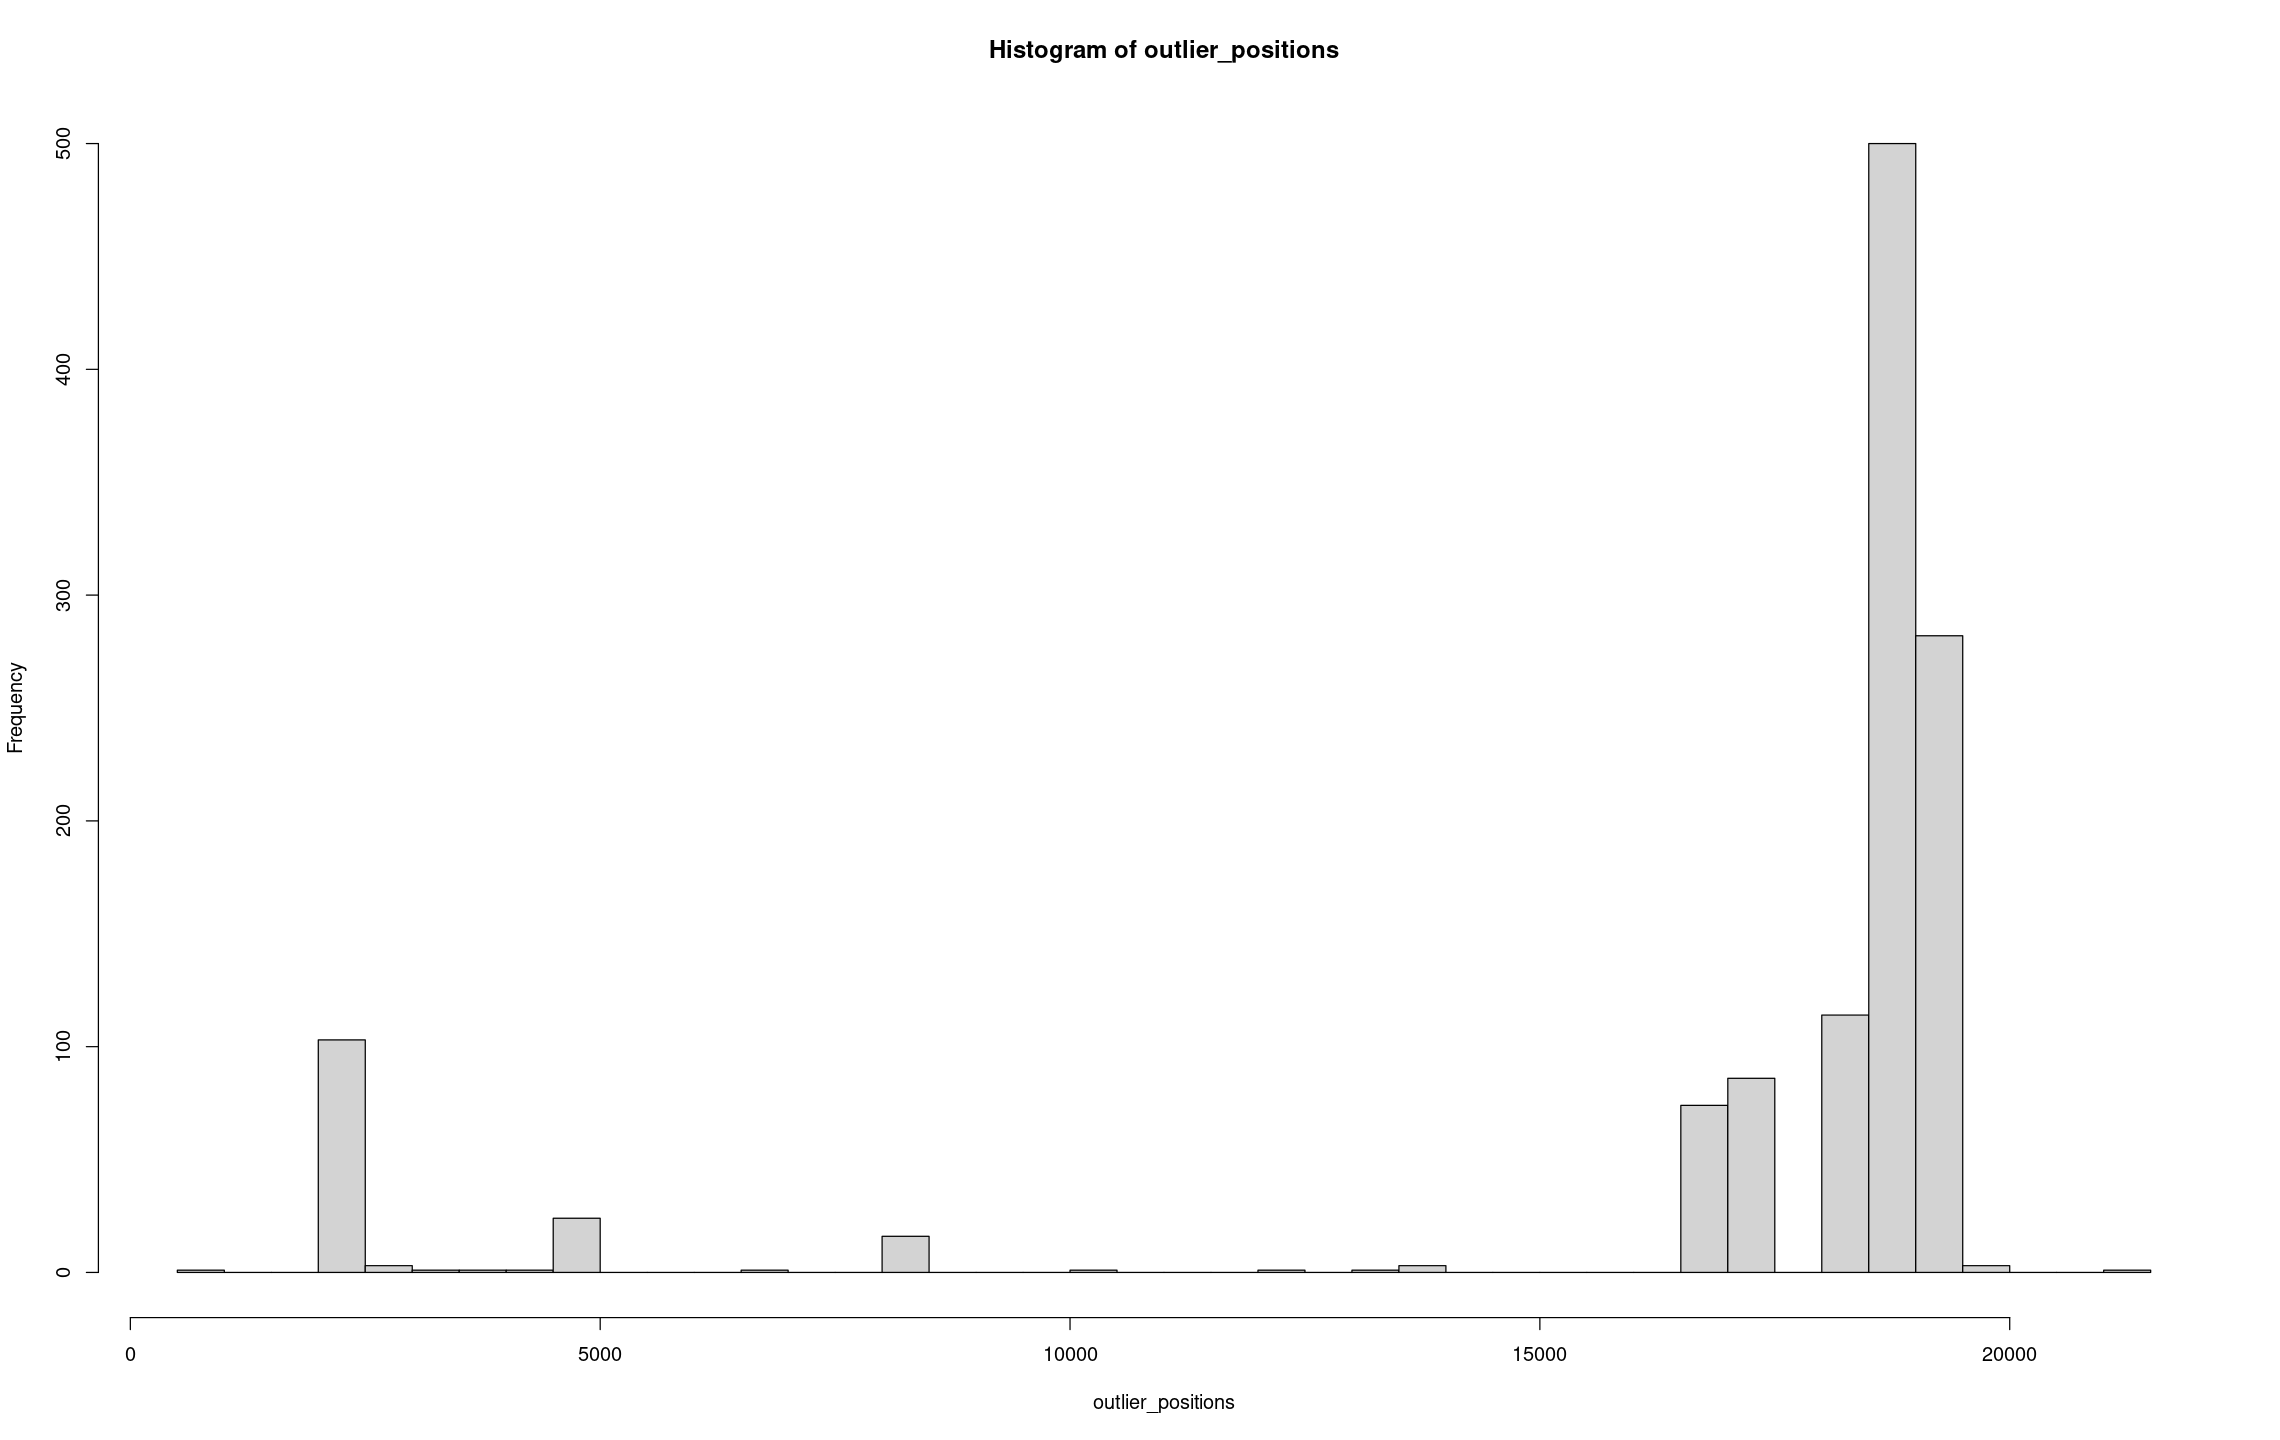

In [11]:
options(repr.plot.width=19, repr.plot.height=12)

hist(outlier_positions, nclass = 50)

In [12]:
outlier_values <- data_object$outlier_values

outlier_values

[1]  1.896739483  2.184873104  2.732779503  3.006222725  3.895150661
   [6]  4.261949539  5.030237198  5.387993336  6.455604553  7.014128208
  [11]  7.308514118  7.610935688  7.798225880  7.907556057  8.119622231
  [16]  8.187675476  8.186152458  8.221673012  8.253808022  8.279128075
  [21]  8.194468498  8.205458641  8.178217888  8.108373642  8.057738304
  [26]  8.026419640  7.876454353  7.860546589  7.798650265  7.701650620
  [31]  7.596509933  7.634211063  7.527653217  7.466311932  7.330577850
  [36]  7.255169392  7.133202553  7.059005737  6.932627678  6.885303974
  [41]  6.739459038  6.542611599  6.318865776  6.100600719  5.890760899
  [46]  5.718430042  5.592728138  5.498566151  5.406100273  5.272714138
  [51]  5.224787712  5.182562351  5.120712280  5.015984535  5.037686348
  [56]  4.976793766  4.972993851  4.952771664  4.952544212  4.916001797
  [61]  4.868603230  4.758296490  4.744183064  4.627686501  4.505286217
  [66]  4.361022472  4.214217186  4.100304127  3.788075924  3.566706896
  [71]  3.326011419  3.083727121  2.921305418  2.771093369  2.604084969
  [76]  2.428661108  2.182354450  2.021286011  1.979350567  1.901482224
  [81]  1.902343631  1.908241272  1.891199112  1.796603322  1.797416687
  [86]  1.731982350  1.790172219  1.726079226  1.761578560  1.738379240
  [91]  1.710216284  1.683633447  1.651308060  1.607185602  1.589137673
  [96]  1.496583700  1.488025546  1.394777656  1.994598389  1.588835359
 [101]  1.997316837  1.539543152  7.775327206  7.452221394  7.210327625
 [106]  6.872229576  6.687652588  6.562489986  6.237672329  6.103162289
 [111]  6.022470474  5.966412067  5.950079918  5.930442810  5.913148403
 [116]  5.852420807  5.738059044  5.540972710  5.297889233  5.168659210
 [121]  5.013502598  4.728649139  4.364569664  4.105094910  3.538748980
 [126]  3.128833055  1.421404243  1.388429999  1.423266888  1.371429920
 [131]  1.381850481  1.363771558  1.362493992  1.365521312  1.428420305
 [136]  1.384734869  2.312228203  2.013200045  1.641437054  1.482069969
 [141]  1.994290948  2.206686974  2.351611614  2.361630201  2.375175953
 [146]  2.357097626  2.335332632  2.237861872  2.207300663  2.154528618
 [151]  2.037995577  1.852188110  1.599881530  1.476365447  1.933547497
 [156]  2.278670311  2.771753311  3.207637787  3.552799940  4.040451527
 [161]  4.936261177  5.273302078  6.326401711  6.946446896  7.370677948
 [166]  8.057784081  8.502832413  9.473826408 10.397840500 10.922791481
 [171] 11.694986343 11.936242104 12.247079849 12.887074470 13.256324768
 [176] 13.450218201 13.612427712 13.801614761 13.892393112 14.008658409
 [181] 14.114330292 14.538104057 14.871605873 15.106700897 15.408733368
 [186] 15.590641022 15.815428734 16.214225769 16.604370117 17.295207977
 [191] 17.692142487 18.242160797 18.493989945 19.090238571 19.255954742
 [196] 19.428293228 20.025951386 20.202747345 20.307353973 20.858482361
 [201] 21.330503464 21.402330399 21.562334061 21.750417709 21.895032883
 [206] 22.090166092 22.273391724 22.054981232 21.796689987 21.498889923
 [211] 17.923336029  8.142934799  1.498943686  1.456199646  1.561164498
 [216]  1.523707151  1.546654224  1.520334840  1.493407488  1.456992984
 [221]  1.428438425  1.378350258  1.397593498  1.419425726  1.374002218
 [226]  1.397343278  1.398015976  1.380879164  1.365323544  1.383475184
 [231]  1.414643645  1.370210409  1.409994960  1.405093551  1.444246531
 [236]  1.489600301  1.495796800  2.090826035  2.122449160  1.714056134
 [241]  1.539587259  1.561247826  1.580358982  1.590499043  1.588261604
 [246]  1.527762055  1.537327409  1.571763277  1.541282892  1.479749322
 [251]  1.498893499  1.494205236  1.470548511  1.397577643  1.379879236
 [256]  1.441509366  1.397251844  1.415836811  1.407254815  1.384488583
 [261]  1.365554094  1.367290258  1.389565468  1.419554591  1.374574661
 [266]  2.145105124  3.340724945  3.664999247  4.570543289  5.712432861
 [271]  6.108156204  6.311995506  6.436964035  6.649435520  6.653500557
 [276]  6.735800743  6.721082687  6.6637973

In [13]:
options(repr.plot.width=19, repr.plot.height=12)

describe(outlier_values)

outlier_values 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1217        0     1217        1    4.206    4.451    1.305    1.329 
     .25      .50      .75      .90      .95 
   1.375    1.489    5.014   15.282   15.358 

lowest : 1.24399 1.24483 1.24502 1.24561 1.24783
highest: 21.7967 21.895  22.055  22.0902 22.2734

In [14]:
outlier_substitutes <- data_object$outlier_substitutes

data.frame("outlier_values" = outlier_values, "outlier_substitutes" = outlier_substitutes)

outlier_values,outlier_substitutes
<dbl>,<dbl>
1.896739483,0.9151949970
2.184873104,0.9181264218
2.732779503,0.9210578466
3.006222725,0.9239892714
3.895150661,0.9269206962
4.261949539,0.9298521210
5.030237198,0.9327835458
5.387993336,0.9357149706
6.455604553,0.9386463954


## Response variable

In [15]:
x <- data_object$response

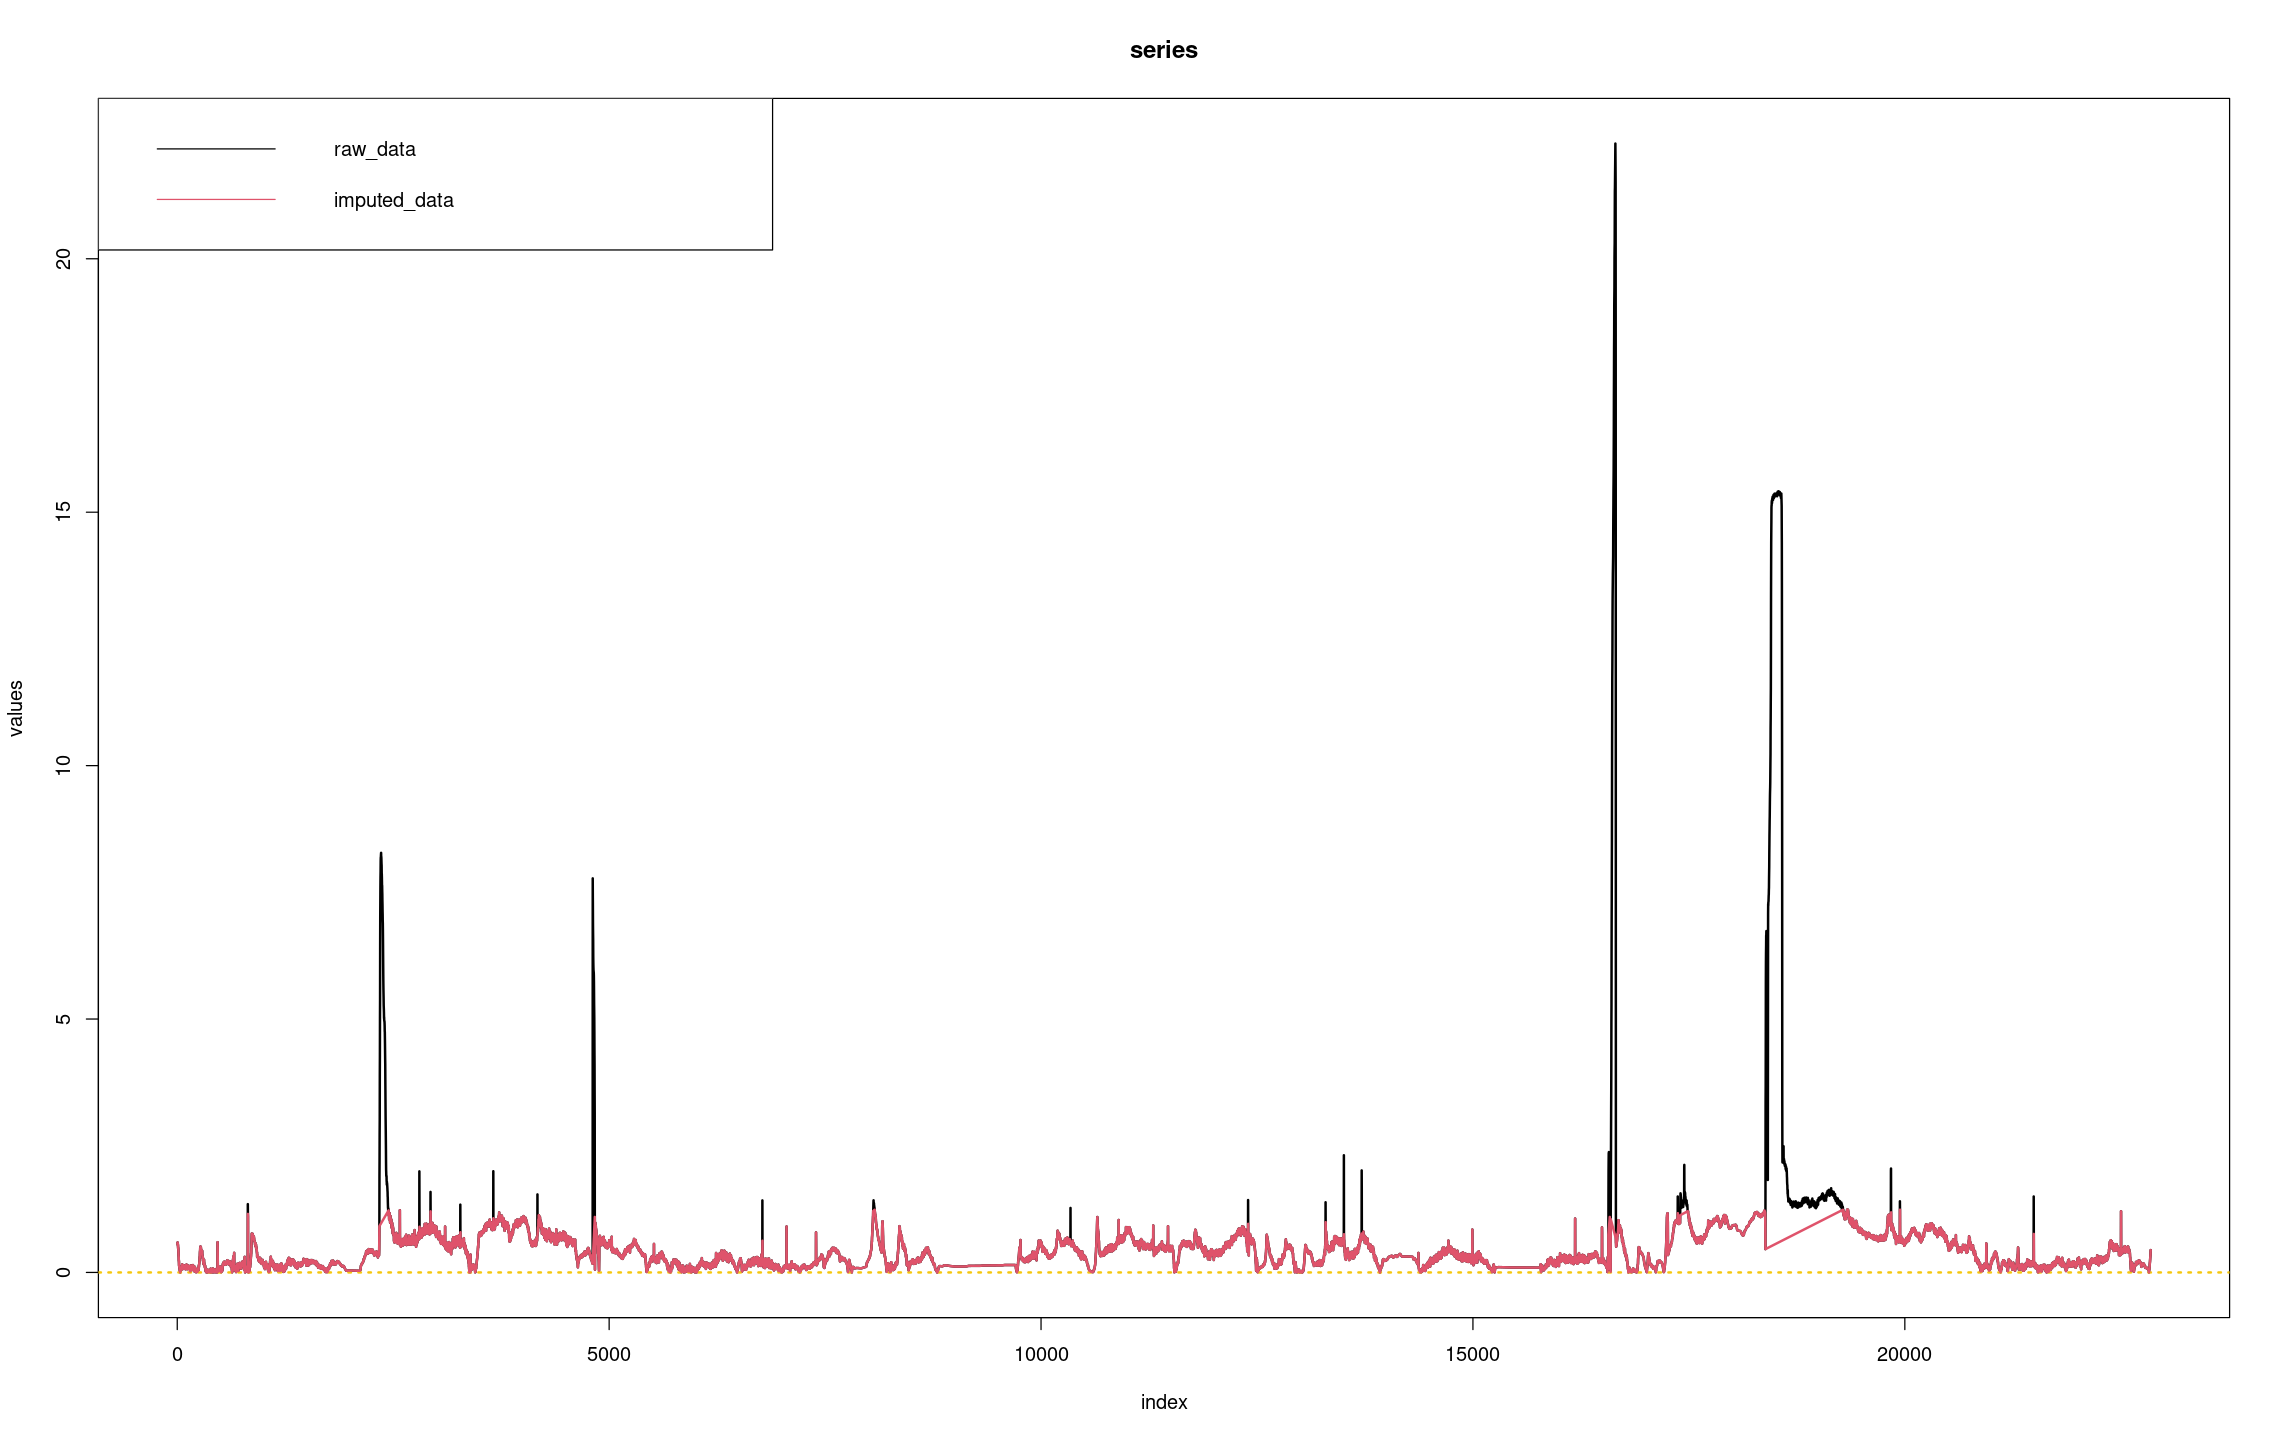

In [16]:
options(repr.plot.width=19, repr.plot.height=12)

plot(abs(data[, response_var]), 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")

abline(h = 0, lty = "dotted", col = 7, lwd = 2)

lines(x, col = 2, lwd = 2)

legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

In [18]:
describe(x)

x 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   22846        0    22580        1   0.4091     0.34  0.04819  0.08723 
     .25      .50      .75      .90      .95 
 0.14571  0.32533  0.61949  0.87972  1.01096 

lowest : 8.5354e-05  8.76884e-05 0.000136104 0.000184512 0.00026877 
highest: 1.23587     1.23702     1.23803     1.2385      1.24009    

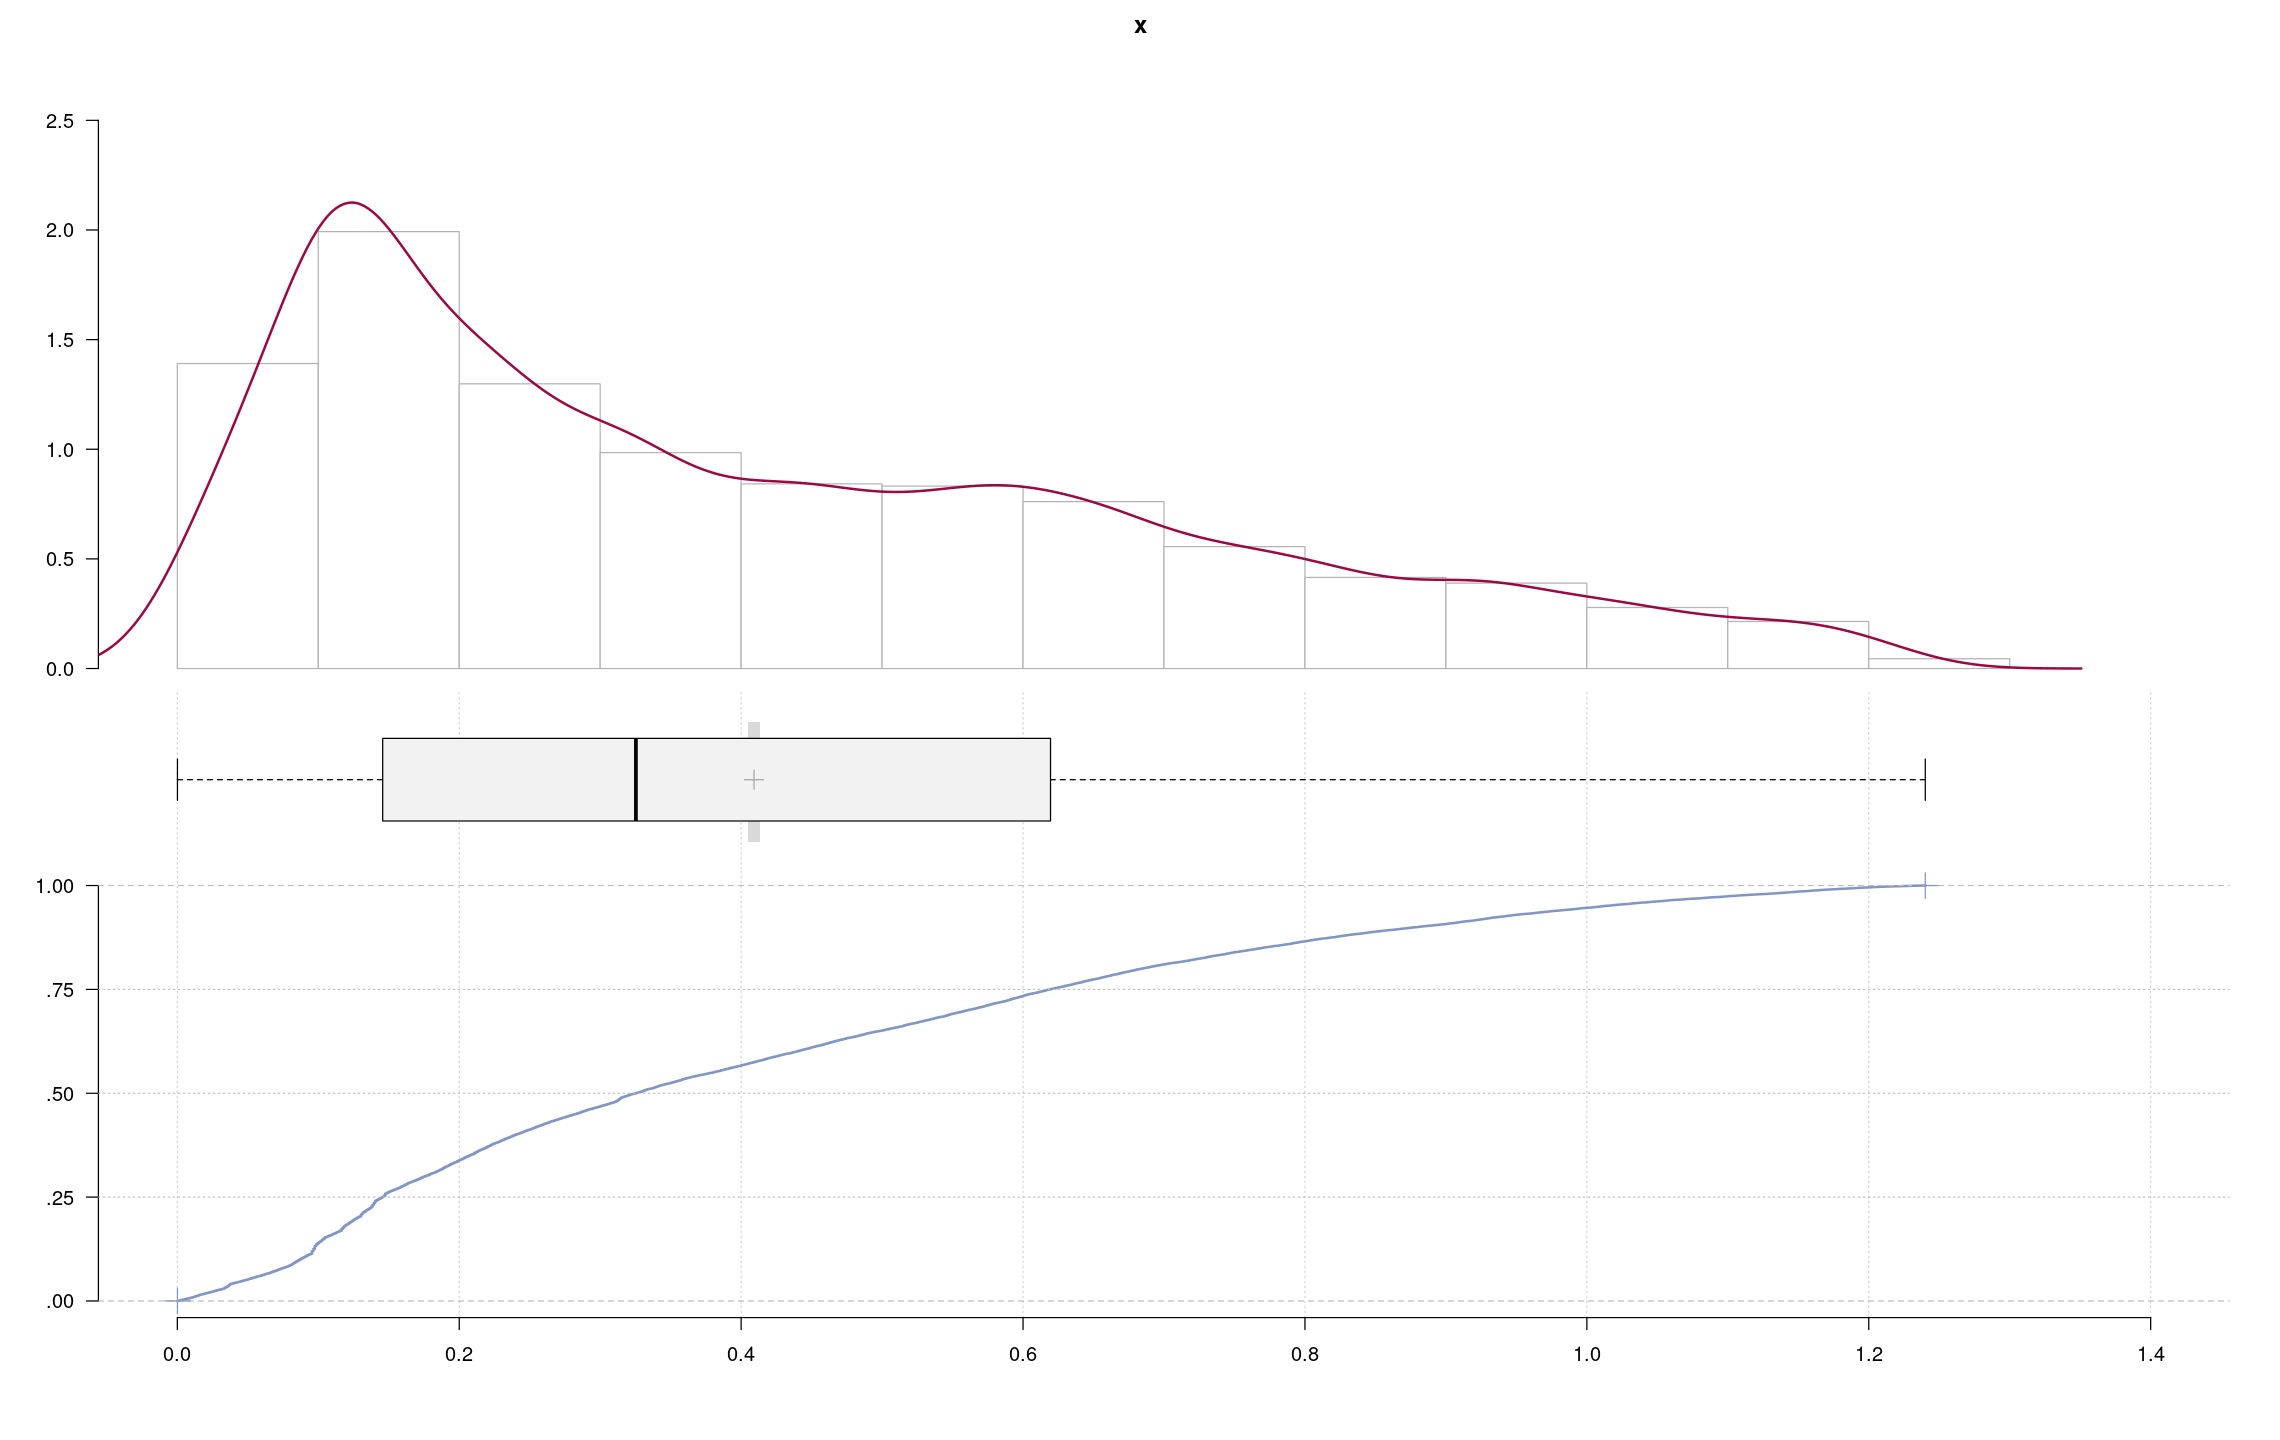

In [20]:
options(repr.plot.width=19, repr.plot.height=12)

PlotFdist(x = x, args.boxplot = list(range = coefficient_iqr))

In [21]:
nlargest <- 20000
y <- extract_nlargest_sample(x, n = nlargest)
describe(y)

y 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   20000        0    19789        1   0.4592   0.3285   0.1155   0.1315 
     .25      .50      .75      .90      .95 
  0.2032   0.3947   0.6591   0.9109   1.0310 

lowest : 0.0968972 0.0969068 0.0969237 0.0969262 0.0969288
highest: 1.23587   1.23702   1.23803   1.2385    1.24009  

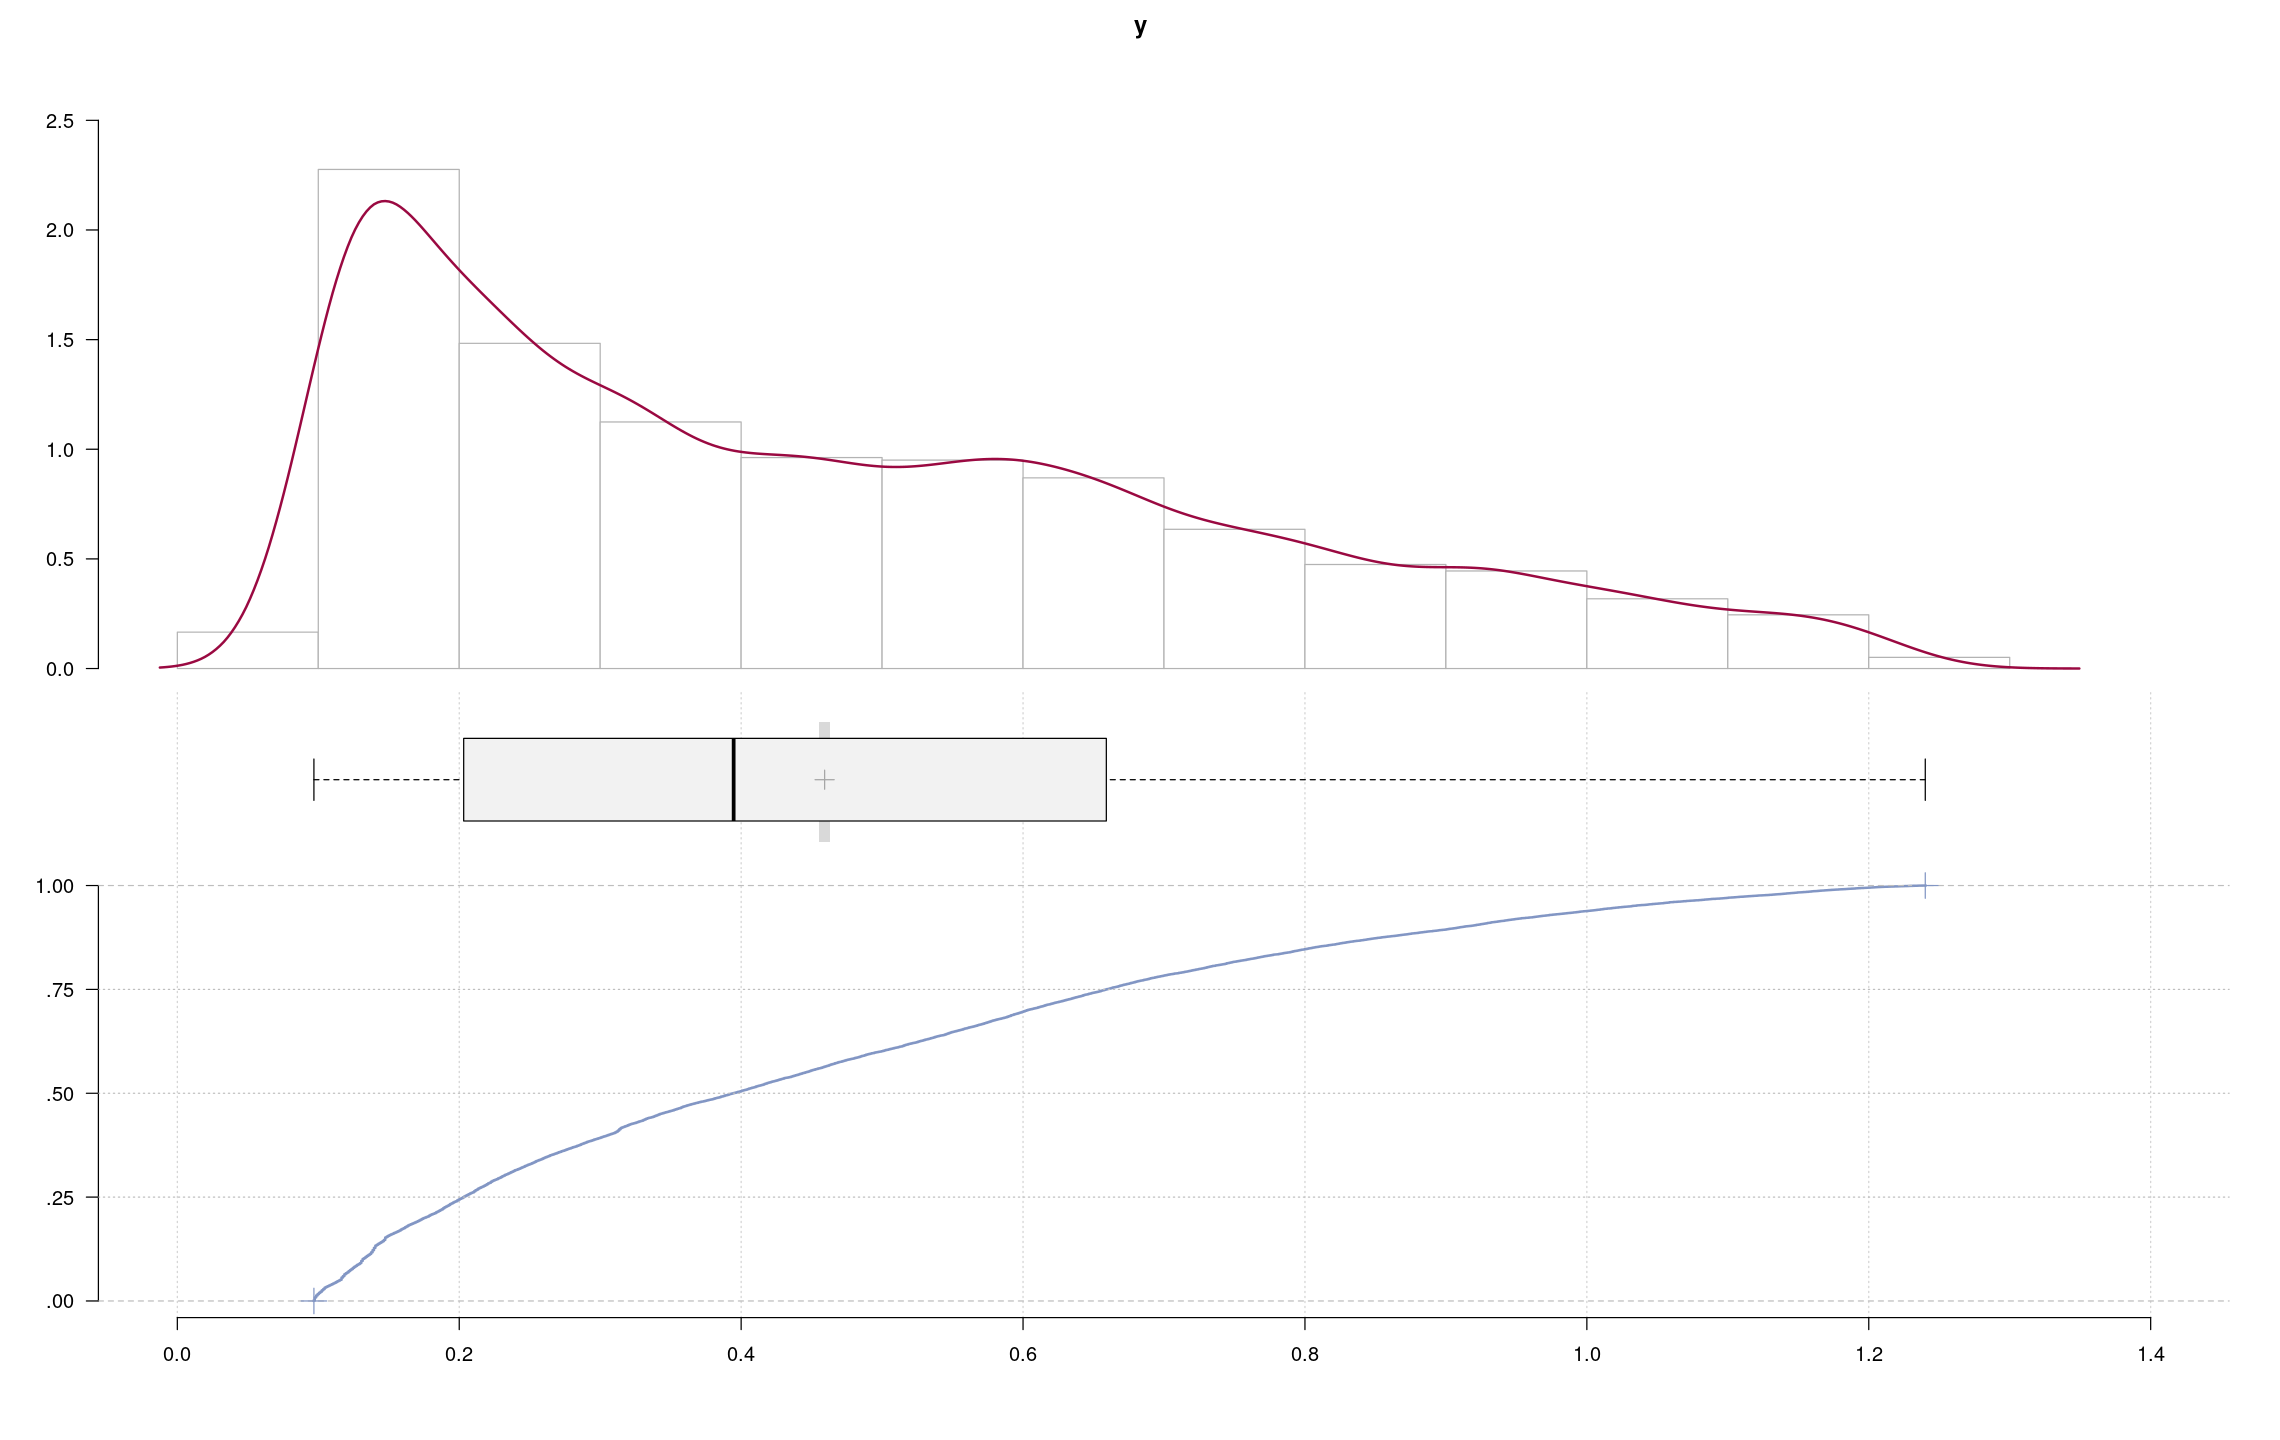

In [22]:
options(repr.plot.width=19, repr.plot.height=12)

PlotFdist(x = y, args.boxplot = list(range = coefficient_iqr))

## Predictor variables

In [23]:
detection_vars <- names(data)[c(11:45)]

data_covariates_detection <- data %>% select(all_of(detection_vars))

tail(data_covariates_detection)

,name_airplane,name_bench,name_bench..group.,name_bicycle,name_bird,name_bird..group.,name_boat,name_bus,name_car,name_car..group.,⋯,name_street.light,name_tenement,name_traffic.light,name_traffic.sign,name_train,name_tree,name_tree..group.,name_truck,name_tunnel,name_tunnel.entrance
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
22841,0,0,0,0,0,0,0,0,3,1,⋯,3,1,1,2,0,0,0,0,0,0
22842,0,0,0,0,0,0,0,1,5,1,⋯,2,2,0,2,0,0,2,1,0,0
22843,0,0,0,0,0,0,0,1,4,0,⋯,5,0,0,5,0,0,2,0,0,0
22844,0,1,0,0,0,0,0,1,3,1,⋯,4,2,0,3,0,1,2,1,0,0
22845,0,1,0,0,0,0,0,0,5,0,⋯,3,2,0,5,0,1,1,0,0,0
22846,0,0,0,0,0,0,0,1,5,1,⋯,2,1,1,3,0,1,1,1,0,0


In [24]:
detection_vars_counts <- apply(data_covariates_detection, 2, sum)

names(detection_vars_counts) <- names(data_covariates_detection)

data.frame("total" = sort(detection_vars_counts, decreasing = TRUE))

,total
,<int>
name_car,138255
name_street.light,110629
name_traffic.sign,103556
name_tree,77977
name_tenement,53488
name_tree..group.,45694
name_traffic.light,44228
name_electric.pole,38739
name_fence,34236


In [20]:
# # select the predictor variables
# predictor_vars <- c("velocity", "object", "area", "horizontal_left", "horizontal_right", "vertical_down", "vertical_up", detection_vars)
# 
# data_covariates <- data %>% select(all_of(predictor_vars))
# 
# str(data_covariates)

In [21]:
# # Remove columns containing only zeros
# # data_covariates_clean <- data_covariates %>% select(where(~ sum(.) != 0))
# data_covariates_clean <- data_covariates %>% select_if(colSums(.) != 0)
# 
# str(data_covariates_clean)

In [22]:
# # scale all predictors variables
# 
# data_covariates_clean_scaled <- get_standard_scaled_data(data_covariates_clean, newdata = NULL)
# 
# str(data_covariates_clean_scaled)

In [25]:
data_covariates <- data_object$predictors

str(data_covariates)

'data.frame':	22846 obs. of  42 variables:
 $ velocity             : num  -0.546 -0.788 -0.809 -0.56 -0.743 ...
 $ object               : num  -1.211 -1.122 -0.586 -1.301 -0.764 ...
 $ area                 : num  -0.598 -0.288 -0.521 -0.894 -0.882 ...
 $ horizontal_left      : num  -1.66 -1.52 -1.66 -1.81 -1.81 ...
 $ horizontal_right     : num  -0.263 -0.263 0.654 -0.263 0.523 ...
 $ vertical_down        : num  -1.147 -1.049 -0.461 -1.245 -0.657 ...
 $ vertical_up          : num  -0.699 -0.699 -0.699 -0.699 -0.699 ...
 $ name_airplane        : num  -0.258 -0.258 -0.258 -0.258 -0.258 ...
 $ name_bench           : num  -0.233 -0.233 -0.233 -0.233 -0.233 ...
 $ name_bench..group.   : num  -0.0945 -0.0945 -0.0945 -0.0945 -0.0945 ...
 $ name_bicycle         : num  -0.268 -0.268 -0.268 -0.268 -0.268 ...
 $ name_bird            : num  -0.108 -0.108 -0.108 -0.108 -0.108 ...
 $ name_bird..group.    : num  -0.00936 -0.00936 -0.00936 -0.00936 -0.00936 ...
 $ name_boat            : num  -0.0684 -

# Model selection

## Candidate block sizes

In [26]:
z <- y

In [27]:
minimum_block_size <- find_minimum_block_size(x = z, threshold = min(z))

print(minimum_block_size)

[1] 3


In [28]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x = z, m = 50)

print(maximum_block_size)

[1] 400


In [29]:
maxima <- extract_block_maxima(x = z, block_size = minimum_block_size)

print(min(maxima))

[1] 0.09695527703


In [30]:
print(median(z))

[1] 0.3946852833


In [31]:
print(calculate_mode(z))

[1] 0.1474975049


In [32]:
candidate_block_sizes <- get_candidate_block_sizes(x = z, threshold = min(z), m = 50)

print(candidate_block_sizes)

  [1]   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
 [19]  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
 [37]  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
 [55]  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
 [73]  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
 [91]  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
[109] 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
[127] 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
[145] 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
[163] 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
[181] 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
[199] 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
[217] 219 220 221 222 223 224 225 226 227 228 229 230 231 232 23

## Hyperparameters

In [32]:
# use.phi <- TRUE
# nlargest <- 10000
# block_sizes <- NULL
# minimum_nblocks <- 50
# threshold <- min(x)
# confidence_level <- 0.95
# use_extremal_index <- TRUE
# use_uniform_prior <- TRUE
# method <- "MLE"

## Candidate models

In [33]:
models_object <- c(list("model_00" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~1),
                        
                        "model_01" = list("location.fun" = ~object, "scale.fun" = ~object, "shape.fun" = ~object),
                        "model_02" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_03" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_04" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~object),
                        "model_05" = list("location.fun" = ~object, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_06" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~object),
                        "model_07" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~object),
                        
                        "model_08" = list("location.fun" = ~area, "scale.fun" = ~area, "shape.fun" = ~area),
                        "model_09" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_10" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_11" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~area),
                        "model_12" = list("location.fun" = ~area, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_13" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~area),
                        "model_14" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~area),
                        
                        "model_15" = list("location.fun" = ~velocity, "scale.fun" = ~velocity, "shape.fun" = ~velocity),
                        "model_16" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_17" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_18" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        "model_19" = list("location.fun" = ~velocity, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_20" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        "model_21" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~velocity),
                        
                        "model_22" = list("location.fun" = ~horizontal_left, "scale.fun" = ~horizontal_left, "shape.fun" = ~horizontal_left),
                        "model_23" = list("location.fun" = ~horizontal_left, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_24" = list("location.fun" = ~1, "scale.fun" = ~horizontal_left, "shape.fun" = ~1),
                        "model_25" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~horizontal_left),
                        "model_26" = list("location.fun" = ~horizontal_left, "scale.fun" = ~horizontal_left, "shape.fun" = ~1),
                        "model_27" = list("location.fun" = ~horizontal_left, "scale.fun" = ~1, "shape.fun" = ~horizontal_left),
                        "model_28" = list("location.fun" = ~1, "scale.fun" = ~horizontal_left, "shape.fun" = ~horizontal_left),
                        
                        "model_29" = list("location.fun" = ~horizontal_right, "scale.fun" = ~horizontal_right, "shape.fun" = ~horizontal_right),
                        "model_30" = list("location.fun" = ~horizontal_right, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_31" = list("location.fun" = ~1, "scale.fun" = ~horizontal_right, "shape.fun" = ~1),
                        "model_32" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~horizontal_right),
                        "model_33" = list("location.fun" = ~horizontal_right, "scale.fun" = ~horizontal_right, "shape.fun" = ~1),
                        "model_34" = list("location.fun" = ~horizontal_right, "scale.fun" = ~1, "shape.fun" = ~horizontal_right),
                        "model_35" = list("location.fun" = ~1, "scale.fun" = ~horizontal_right, "shape.fun" = ~horizontal_right),
                        
                        "model_36" = list("location.fun" = ~vertical_up, "scale.fun" = ~vertical_up, "shape.fun" = ~vertical_up),
                        "model_37" = list("location.fun" = ~vertical_up, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_38" = list("location.fun" = ~1, "scale.fun" = ~vertical_up, "shape.fun" = ~1),
                        "model_39" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~vertical_up),
                        "model_40" = list("location.fun" = ~vertical_up, "scale.fun" = ~vertical_up, "shape.fun" = ~1),
                        "model_41" = list("location.fun" = ~vertical_up, "scale.fun" = ~1, "shape.fun" = ~vertical_up),
                        "model_42" = list("location.fun" = ~1, "scale.fun" = ~vertical_up, "shape.fun" = ~vertical_up),
                        
                        "model_43" = list("location.fun" = ~vertical_down, "scale.fun" = ~vertical_down, "shape.fun" = ~vertical_down),
                        "model_44" = list("location.fun" = ~vertical_down, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_45" = list("location.fun" = ~1, "scale.fun" = ~vertical_down, "shape.fun" = ~1),
                        "model_46" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~vertical_down),
                        "model_47" = list("location.fun" = ~vertical_down, "scale.fun" = ~vertical_down, "shape.fun" = ~1),
                        "model_48" = list("location.fun" = ~vertical_down, "scale.fun" = ~1, "shape.fun" = ~vertical_down),
                        "model_49" = list("location.fun" = ~1, "scale.fun" = ~vertical_down, "shape.fun" = ~vertical_down),
                        
                        "model_50" = list("location.fun" = ~name_car, "scale.fun" = ~name_car, "shape.fun" = ~name_car),
                        "model_51" = list("location.fun" = ~name_car, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_52" = list("location.fun" = ~1, "scale.fun" = ~name_car, "shape.fun" = ~1),
                        "model_53" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_car),
                        "model_54" = list("location.fun" = ~name_car, "scale.fun" = ~name_car, "shape.fun" = ~1),
                        "model_55" = list("location.fun" = ~name_car, "scale.fun" = ~1, "shape.fun" = ~name_car),
                        "model_56" = list("location.fun" = ~1, "scale.fun" = ~name_car, "shape.fun" = ~name_car),
                        
                        "model_57" = list("location.fun" = ~name_street.light, "scale.fun" = ~name_street.light, "shape.fun" = ~name_street.light),
                        "model_58" = list("location.fun" = ~name_street.light, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_59" = list("location.fun" = ~1, "scale.fun" = ~name_street.light, "shape.fun" = ~1),
                        "model_60" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_street.light),
                        "model_61" = list("location.fun" = ~name_street.light, "scale.fun" = ~name_street.light, "shape.fun" = ~1),
                        "model_62" = list("location.fun" = ~name_street.light, "scale.fun" = ~1, "shape.fun" = ~name_street.light),
                        "model_63" = list("location.fun" = ~1, "scale.fun" = ~name_street.light, "shape.fun" = ~name_street.light),
                        
                        "model_64" = list("location.fun" = ~name_traffic.sign, "scale.fun" = ~name_traffic.sign, "shape.fun" = ~name_traffic.sign),
                        "model_65" = list("location.fun" = ~name_traffic.sign, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_66" = list("location.fun" = ~1, "scale.fun" = ~name_traffic.sign, "shape.fun" = ~1),
                        "model_67" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_traffic.sign),
                        "model_68" = list("location.fun" = ~name_traffic.sign, "scale.fun" = ~name_traffic.sign, "shape.fun" = ~1),
                        "model_69" = list("location.fun" = ~name_traffic.sign, "scale.fun" = ~1, "shape.fun" = ~name_traffic.sign),
                        "model_70" = list("location.fun" = ~1, "scale.fun" = ~name_traffic.sign, "shape.fun" = ~name_traffic.sign),
                        
                        "model_71" = list("location.fun" = ~name_tree, "scale.fun" = ~name_tree, "shape.fun" = ~name_tree),
                        "model_72" = list("location.fun" = ~name_tree, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_73" = list("location.fun" = ~1, "scale.fun" = ~name_tree, "shape.fun" = ~1),
                        "model_74" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_tree),
                        "model_75" = list("location.fun" = ~name_tree, "scale.fun" = ~name_tree, "shape.fun" = ~1),
                        "model_76" = list("location.fun" = ~name_tree, "scale.fun" = ~1, "shape.fun" = ~name_tree),
                        "model_77" = list("location.fun" = ~1, "scale.fun" = ~name_tree, "shape.fun" = ~name_tree),
                        
                        "model_78" = list("location.fun" = ~name_tenement, "scale.fun" = ~name_tenement, "shape.fun" = ~name_tenement),
                        "model_79" = list("location.fun" = ~name_tenement, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_80" = list("location.fun" = ~1, "scale.fun" = ~name_tenement, "shape.fun" = ~1),
                        "model_81" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_tenement),
                        "model_82" = list("location.fun" = ~name_tenement, "scale.fun" = ~name_tenement, "shape.fun" = ~1),
                        "model_83" = list("location.fun" = ~name_tenement, "scale.fun" = ~1, "shape.fun" = ~name_tenement),
                        "model_84" = list("location.fun" = ~1, "scale.fun" = ~name_tenement, "shape.fun" = ~name_tenement),
                        
                        "model_85" = list("location.fun" = ~name_tree..group., "scale.fun" = ~name_tree..group., "shape.fun" = ~name_tree..group.),
                        "model_86" = list("location.fun" = ~name_tree..group., "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_87" = list("location.fun" = ~1, "scale.fun" = ~name_tree..group., "shape.fun" = ~1),
                        "model_88" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_tree..group.),
                        "model_89" = list("location.fun" = ~name_tree..group., "scale.fun" = ~name_tree..group., "shape.fun" = ~1),
                        "model_90" = list("location.fun" = ~name_tree..group., "scale.fun" = ~1, "shape.fun" = ~name_tree..group.),
                        "model_91" = list("location.fun" = ~1, "scale.fun" = ~name_tree..group., "shape.fun" = ~name_tree..group.),
                        
                        "model_92" = list("location.fun" = ~name_traffic.light, "scale.fun" = ~name_traffic.light, "shape.fun" = ~name_traffic.light),
                        "model_93" = list("location.fun" = ~name_traffic.light, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_94" = list("location.fun" = ~1, "scale.fun" = ~name_traffic.light, "shape.fun" = ~1),
                        "model_95" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_traffic.light),
                        "model_96" = list("location.fun" = ~name_traffic.light, "scale.fun" = ~name_traffic.light, "shape.fun" = ~1),
                        "model_97" = list("location.fun" = ~name_traffic.light, "scale.fun" = ~1, "shape.fun" = ~name_traffic.light),
                        "model_98" = list("location.fun" = ~1, "scale.fun" = ~name_traffic.light, "shape.fun" = ~name_traffic.light),
                        
                        "model_99" = list("location.fun" = ~name_electric.pole, "scale.fun" = ~name_electric.pole, "shape.fun" = ~name_electric.pole),
                        "model_100" = list("location.fun" = ~name_electric.pole, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_101" = list("location.fun" = ~1, "scale.fun" = ~name_electric.pole, "shape.fun" = ~1),
                        "model_102" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_electric.pole),
                        "model_103" = list("location.fun" = ~name_electric.pole, "scale.fun" = ~name_electric.pole, "shape.fun" = ~1),
                        "model_104" = list("location.fun" = ~name_electric.pole, "scale.fun" = ~1, "shape.fun" = ~name_electric.pole),
                        "model_105" = list("location.fun" = ~1, "scale.fun" = ~name_electric.pole, "shape.fun" = ~name_electric.pole),
                        
                        "model_106" = list("location.fun" = ~name_fence, "scale.fun" = ~name_fence, "shape.fun" = ~name_fence),
                        "model_107" = list("location.fun" = ~name_fence, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_108" = list("location.fun" = ~1, "scale.fun" = ~name_fence, "shape.fun" = ~1),
                        "model_109" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_fence),
                        "model_110" = list("location.fun" = ~name_fence, "scale.fun" = ~name_fence, "shape.fun" = ~1),
                        "model_111" = list("location.fun" = ~name_fence, "scale.fun" = ~1, "shape.fun" = ~name_fence),
                        "model_112" = list("location.fun" = ~1, "scale.fun" = ~name_fence, "shape.fun" = ~name_fence),
                        
                        "model_113" = list("location.fun" = ~name_person, "scale.fun" = ~name_person, "shape.fun" = ~name_person),
                        "model_114" = list("location.fun" = ~name_person, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_115" = list("location.fun" = ~1, "scale.fun" = ~name_person, "shape.fun" = ~1),
                        "model_116" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_person),
                        "model_117" = list("location.fun" = ~name_person, "scale.fun" = ~name_person, "shape.fun" = ~1),
                        "model_118" = list("location.fun" = ~name_person, "scale.fun" = ~1, "shape.fun" = ~name_person),
                        "model_119" = list("location.fun" = ~1, "scale.fun" = ~name_person, "shape.fun" = ~name_person),
                        
                        "model_120" = list("location.fun" = ~name_truck, "scale.fun" = ~name_truck, "shape.fun" = ~name_truck),
                        "model_121" = list("location.fun" = ~name_truck, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_122" = list("location.fun" = ~1, "scale.fun" = ~name_truck, "shape.fun" = ~1),
                        "model_123" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_truck),
                        "model_124" = list("location.fun" = ~name_truck, "scale.fun" = ~name_truck, "shape.fun" = ~1),
                        "model_125" = list("location.fun" = ~name_truck, "scale.fun" = ~1, "shape.fun" = ~name_truck),
                        "model_126" = list("location.fun" = ~1, "scale.fun" = ~name_truck, "shape.fun" = ~name_truck),
                        
                        "model_127" = list("location.fun" = ~name_car..group., "scale.fun" = ~name_car..group., "shape.fun" = ~name_car..group.),
                        "model_128" = list("location.fun" = ~name_car..group., "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_129" = list("location.fun" = ~1, "scale.fun" = ~name_car..group., "shape.fun" = ~1),
                        "model_130" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_car..group.),
                        "model_131" = list("location.fun" = ~name_car..group., "scale.fun" = ~name_car..group., "shape.fun" = ~1),
                        "model_132" = list("location.fun" = ~name_car..group., "scale.fun" = ~1, "shape.fun" = ~name_car..group.),
                        "model_133" = list("location.fun" = ~1, "scale.fun" = ~name_car..group., "shape.fun" = ~name_car..group.),
                        
                        "model_134" = list("location.fun" = ~name_house..group., "scale.fun" = ~name_house..group., "shape.fun" = ~name_house..group.),
                        "model_135" = list("location.fun" = ~name_house..group., "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_136" = list("location.fun" = ~1, "scale.fun" = ~name_house..group., "shape.fun" = ~1),
                        "model_137" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_house..group.),
                        "model_138" = list("location.fun" = ~name_house..group., "scale.fun" = ~name_house..group., "shape.fun" = ~1),
                        "model_139" = list("location.fun" = ~name_house..group., "scale.fun" = ~1, "shape.fun" = ~name_house..group.),
                        "model_140" = list("location.fun" = ~1, "scale.fun" = ~name_house..group., "shape.fun" = ~name_house..group.),
                        
                        "model_141" = list("location.fun" = ~name_house, "scale.fun" = ~name_house, "shape.fun" = ~name_house),
                        "model_142" = list("location.fun" = ~name_house, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_143" = list("location.fun" = ~1, "scale.fun" = ~name_house, "shape.fun" = ~1),
                        "model_144" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_house),
                        "model_145" = list("location.fun" = ~name_house, "scale.fun" = ~name_house, "shape.fun" = ~1),
                        "model_146" = list("location.fun" = ~name_house, "scale.fun" = ~1, "shape.fun" = ~name_house),
                        "model_147" = list("location.fun" = ~1, "scale.fun" = ~name_house, "shape.fun" = ~name_house),
                        
                        "model_148" = list("location.fun" = ~name_bus, "scale.fun" = ~name_bus, "shape.fun" = ~name_bus),
                        "model_149" = list("location.fun" = ~name_bus, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_150" = list("location.fun" = ~1, "scale.fun" = ~name_bus, "shape.fun" = ~1),
                        "model_151" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_bus),
                        "model_152" = list("location.fun" = ~name_bus, "scale.fun" = ~name_bus, "shape.fun" = ~1),
                        "model_153" = list("location.fun" = ~name_bus, "scale.fun" = ~1, "shape.fun" = ~name_bus),
                        "model_154" = list("location.fun" = ~1, "scale.fun" = ~name_bus, "shape.fun" = ~name_bus),
                        
                        "model_155" = list("location.fun" = ~name_special.building, "scale.fun" = ~name_special.building, "shape.fun" = ~name_special.building),
                        "model_156" = list("location.fun" = ~name_special.building, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_157" = list("location.fun" = ~1, "scale.fun" = ~name_special.building, "shape.fun" = ~1),
                        "model_158" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_special.building),
                        "model_159" = list("location.fun" = ~name_special.building, "scale.fun" = ~name_special.building, "shape.fun" = ~1),
                        "model_160" = list("location.fun" = ~name_special.building, "scale.fun" = ~1, "shape.fun" = ~name_special.building),
                        "model_161" = list("location.fun" = ~1, "scale.fun" = ~name_special.building, "shape.fun" = ~name_special.building)))


## Estimations

In [34]:
# defaultW <- getOption("warn") 
# 
# options(warn = -1) 
# 
# 
# fitted_models_object <- lapply(models_object, function(model){
#   try({
#     ns_gev_mixture_model_object <- fit_non_stationary_gev_mixture_model(x = x,
#                                                                         data = data_covariates_clean_scaled,
#                                                                         location.fun = model$location.fun,
#                                                                         scale.fun = model$scale.fun,
#                                                                         shape.fun = model$shape.fun,
#                                                                         use.phi = use.phi,
#                                                                         nlargest = nlargest,
#                                                                         block_sizes = block_sizes,
#                                                                         minimum_nblocks = minimum_nblocks,
#                                                                         threshold = threshold,
#                                                                         confidence_level = confidence_level,
#                                                                         use_extremal_index = use_extremal_index,
#                                                                         use_uniform_prior = use_uniform_prior,
#                                                                         method = method)
#     
#     model_vector <- as.character(model)
#     names(model_vector) <- c("location.fun", "scale.fun", "shape.fun")
#     
#     information_criteria <- ns_gev_mixture_model_object$information_criteria
#     
#     c(model_vector, information_criteria)
#   },
#   silent = TRUE)
#   
# })
# 
# 
# options(warn = defaultW)

In [35]:
# success <- sapply(fitted_models_object, function(x) !inherits(x, "try-error"))
# 
# success

In [36]:
# table(success)

In [37]:
# fitted_models_object_success <- fitted_models_object[success]
# 
# fitted_models_object_success_df <- do.call(rbind, fitted_models_object_success)
# 
# fitted_models_object_success_df <- data.frame("model_names" = rownames(fitted_models_object_success_df),
#                                               fitted_models_object_success_df)
# 
# rownames(fitted_models_object_success_df) <- 1:nrow(fitted_models_object_success_df)
# 
# fitted_models_object_success_df

In [38]:
# write.csv(x = fitted_models_object_success_df, file = "./fitted_models_information.csv", row.names = FALSE)

# Best model

## Identification

In [34]:
aic_path <- "./04_experimentation_01/lateral_error_model_aic.csv"

fitted_models_information <- xfun::in_dir(dir = path, expr = read_data(aic_path))

In [35]:
rank <- order(fitted_models_information$AIC)

fitted_models_information_sorted <- fitted_models_information %>% slice(rank)

fitted_models_information_sorted

model_names,location.fun,scale.fun,shape.fun,AIC,BIC,variable
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
model_02,~vertical_down,~1,~1,9338.509028,10160.47173,vertical_down
model_00,~1,~1,~1,9463.106454,10055.86802,1
model_02,~name_street.light,~1,~1,9499.771160,10321.73387,name_street.light
model_02,~object,~1,~1,9737.664020,10638.66160,object
model_02,~horizontal_right,~1,~1,10144.063521,11124.09598,horizontal_right
model_02,~velocity,~1,~1,10168.971504,11346.59115,velocity
model_02,~name_car,~1,~1,10207.105541,11187.13800,name_car
model_03,~1,~object,~1,10480.554546,11500.10444,object
model_02,~name_traffic.sign,~1,~1,10634.239329,11693.30666,name_traffic.sign


In [36]:
model_position <- which(fitted_models_information_sorted$model_names == "model_02" &
                        fitted_models_information_sorted$variable == "object")

selected_model <- fitted_models_information_sorted |> slice(model_position)

selected_model

model_names,location.fun,scale.fun,shape.fun,AIC,BIC,variable
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
model_02,~object,~1,~1,9737.66402,10638.6616,object


In [37]:
selected_model_variable <- selected_model$variable

selected_model_variable

[1] "object"

## Estimation

In [38]:
use.phi <- TRUE
nlargest <- 20000
block_sizes <- NULL
minimum_nblocks <- 50
threshold <- min(x)
confidence_level <- 0.95
use_extremal_index <- TRUE
use_uniform_prior <- TRUE
method <- "MLE"

In [39]:
defaultW <- getOption("warn") 

options(warn = -1) 

ns_gev_mixture_model_object <- fit_non_stationary_gev_mixture_model(x = x,
                                                                    data = data_covariates,
                                                                    location.fun = as.formula(selected_model$location.fun),
                                                                    scale.fun = as.formula(selected_model$scale.fun),
                                                                    shape.fun = as.formula(selected_model$shape.fun),
                                                                    use.phi = use.phi,
                                                                    nlargest = nlargest,
                                                                    block_sizes = block_sizes,
                                                                    minimum_nblocks = minimum_nblocks,
                                                                    threshold = threshold,
                                                                    confidence_level = confidence_level,
                                                                    use_extremal_index = use_extremal_index,
                                                                    use_uniform_prior = use_uniform_prior,
                                                                    method = method)

options(warn = defaultW)

In [41]:
print(names(ns_gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "selected_ns_gev_coefficients"         
[16] "unnormalized_gev_parameters_object"   
[17] "normalized_gev_parameters_object"     
[18] "full_normalized_gev_parameters_object"
[19] "selected_model_per_obs"               
[20] "all_data_covariates"                  
[21] "partial_data_covariates"              
[22] "partial_data"                         
[23] "all_

In [42]:
ns_gev_mixture_model_object$selected_ns_gev_coefficients

,mu0,mu1,scale,shape
,<dbl>,<dbl>,<dbl>,<dbl>
2,0.3184445713,-0.031512268087,0.2052884448,0.1674218469
178,0.6534334816,-0.071260122808,0.3348762325,-0.4872727325
182,0.6454130535,-0.094572595644,0.3204423939,-0.4506776602
184,0.6375668080,-0.090316393827,0.3261867817,-0.4518760124
188,0.6483918606,-0.070993431592,0.3333389947,-0.4724606233
193,0.6766209589,-0.059934343582,0.3540626493,-0.5608628652
195,0.6535789695,-0.104502014210,0.3221645891,-0.4418898560
196,0.6569414286,-0.086575522863,0.3334920348,-0.4847749844
199,0.6506377883,-0.083948985129,0.3256622842,-0.4643652399


In [43]:
data.frame("weights" = ns_gev_mixture_model_object$weights)

,weights
,<dbl>
2,0.7040204020402
178,0.0121512151215
182,0.0013501350135
184,0.0018501850185
188,0.0188518851885
193,0.0002000200020
195,0.0015001500150
196,0.0055005500550
199,0.0823082308231


In [44]:
highest_weighted_model <- which.max(ns_gev_mixture_model_object$weights)

highest_weighted_model

2 
1

In [45]:
model_quality <- round(ns_gev_mixture_model_object$information_criteria, 3)

model_quality

AIC      BIC 
3449.820 5022.614

## Diagnostic

In [50]:
data_index = 0
model_index = 0
zoom_threshold = NULL
iterations = 10

In [55]:
weights <- ns_gev_mixture_model_object$weights
model_index <- floor(model_index)
partial_data <- ns_gev_mixture_model_object$partial_data
partial_data_covariates <- ns_gev_mixture_model_object$partial_data_covariates
data_index <- floor(data_index)

In [59]:
index <- which.max(partial_data)
data <- dplyr::slice(partial_data_covariates, index)
selected_ns_gev_models <- ns_gev_mixture_model_object$selected_ns_gev_models
selected_full_ns_gev_models <- ns_gev_mixture_model_object$selected_full_ns_gev_models
threshold <- ns_gev_mixture_model_object$threshold

In [61]:
normalized_gev_parameters <- get_several_ns_gev_model_normalized_parameters(several_ns_gev_models = selected_full_ns_gev_models,
                                                                                data = data,
                                                                                use_extremal_index = TRUE,
                                                                                normalize_parameters = TRUE)

normalized_gev_parameters <- do.call(rbind, normalized_gev_parameters)

shapes <- normalized_gev_parameters$shape
scales <- normalized_gev_parameters$scale
locations <- normalized_gev_parameters$location

In [80]:
several_standard_uniform_residuals <- lapply(selected_ns_gev_models, function(model){
    standard_gumbel_residuals <- extRemes::trans(model)
    standard_uniform_residuals <- calculate_gev_cdf(q = standard_gumbel_residuals,
                                                    loc = 0, 
                                                    scale = 1, 
                                                    shape = 0)
    standard_uniform_residuals
  })
unified_standard_uniform_residuals <- unlist(several_standard_uniform_residuals)
unified_standard_uniform_residuals <- unified_standard_uniform_residuals[is.finite(unified_standard_uniform_residuals)]
unified_standard_uniform_residuals_range <- range(unified_standard_uniform_residuals, na.rm = FALSE)

In [81]:
unified_standard_uniform_residuals_range

[1] 0.007637183881 1.000000000000

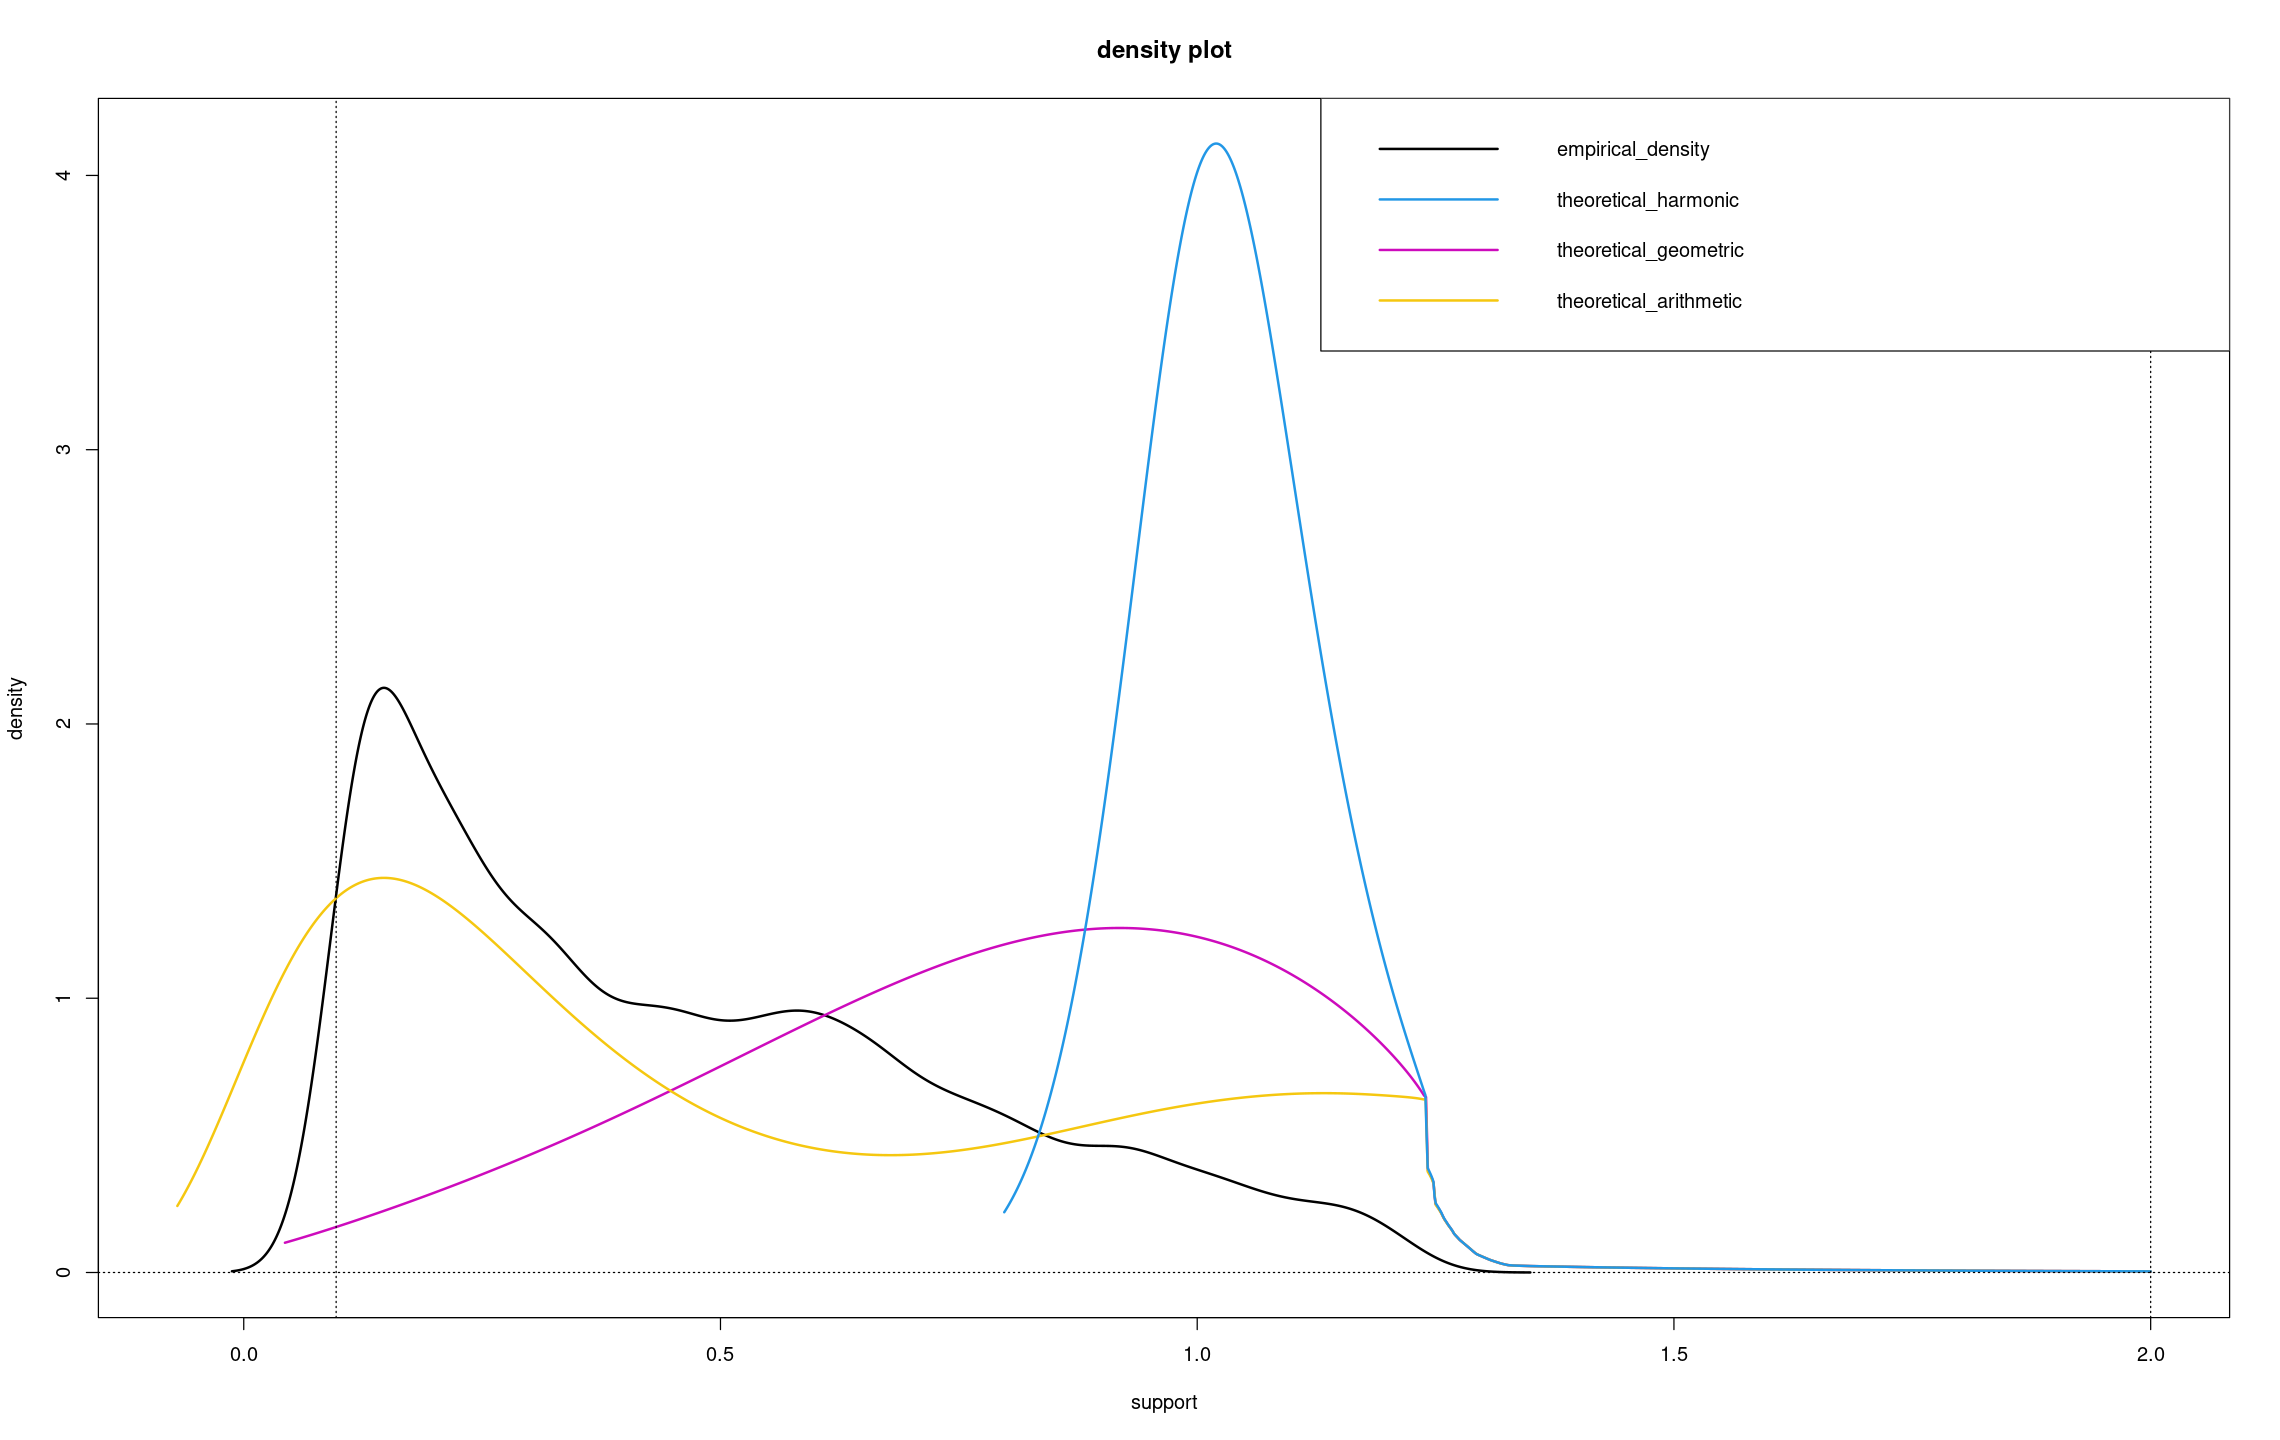

In [138]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = 0,
                                          zoom_thresholds = c(NA, 2),
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

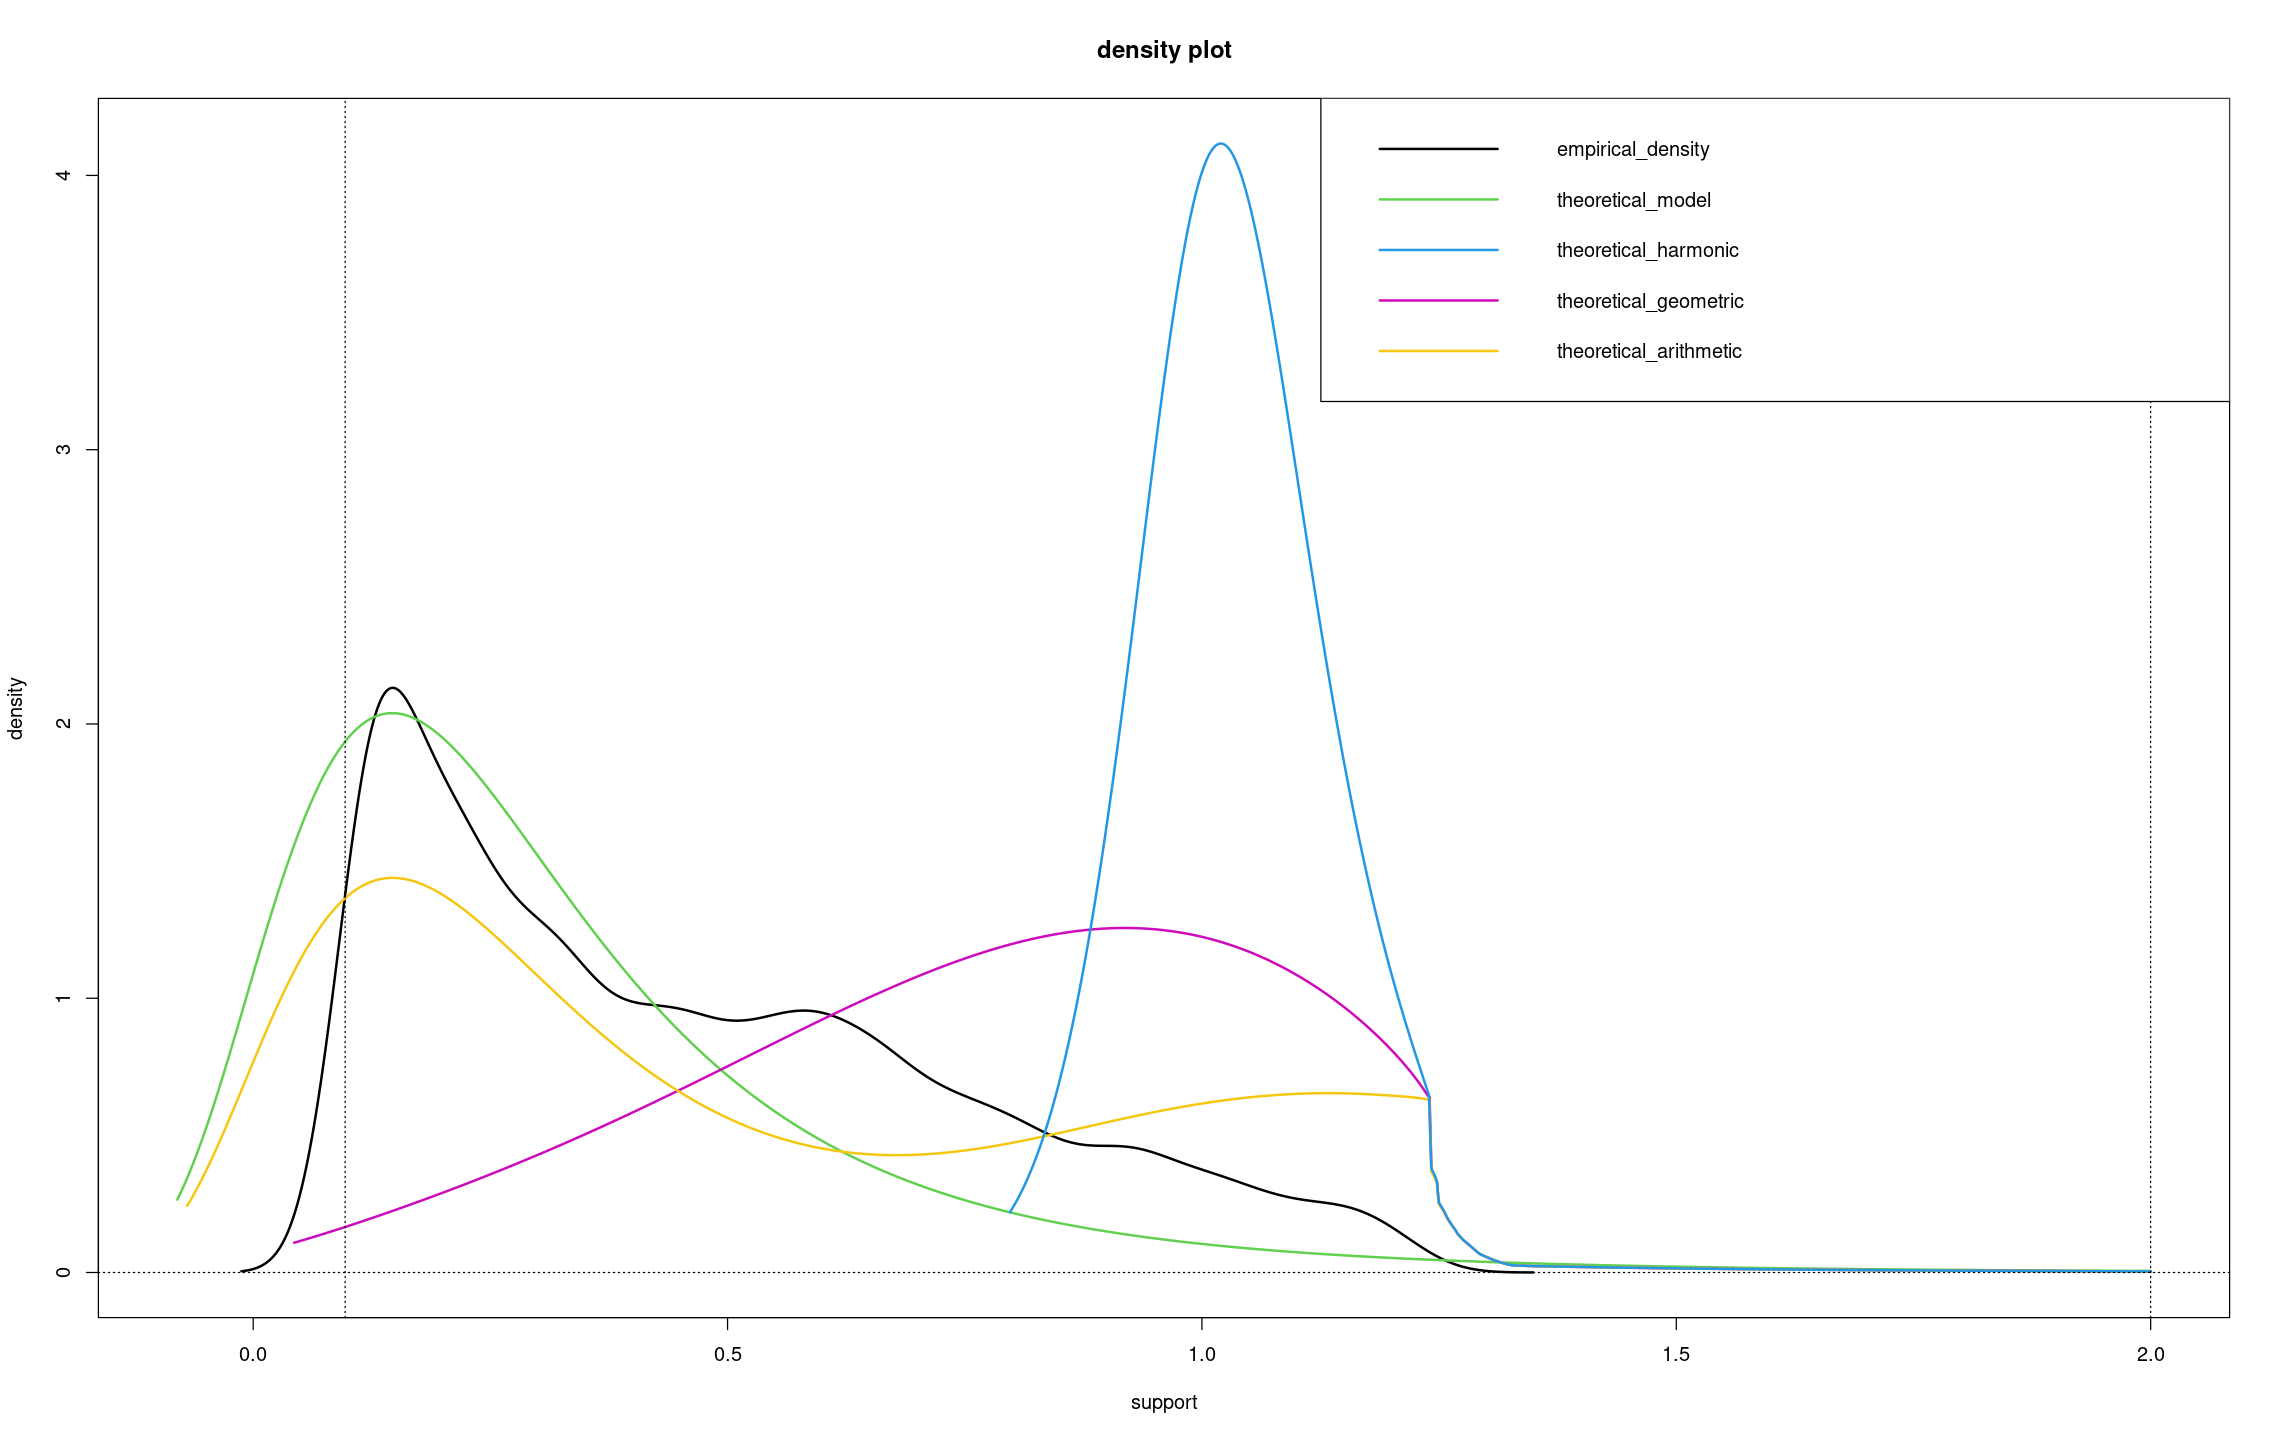

In [144]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = which.max(ns_gev_mixture_model_object$weights),
                                          zoom_thresholds = c(NA, 2),
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

# Quantiles

## Quantile order: alpha = n^(-1)

In [88]:
n <- length(x)

alpha <- n^(-1)

print(alpha)

[1] 4.377133853e-05


## Quantiles vs covariates

In [89]:
partial_data_covariates <- ns_gev_mixture_model_object$partial_data_covariates

partial_data_covariates_variable <- partial_data_covariates |> select(all_of(selected_model_variable))

partial_data_covariates_variable

object
<dbl>
-1.211410243
-1.122007764
-0.585592890
-1.300812722
-0.764397848
-0.764397848
-0.853800327
-0.943202806
-0.853800327


In [90]:
range(partial_data_covariates_variable)

[1] -2.910057344  3.437518665

In [91]:
variable_values <- seq(from = min(partial_data_covariates_variable),
                       to = max(partial_data_covariates_variable),
                       length.out = 100)

new_covariates_values <- data.frame(variable_values)

names(new_covariates_values) <- selected_model_variable

new_covariates_values

object
<dbl>
-2.910057344
-2.845940415
-2.781823485
-2.717706556
-2.653589627
-2.589472697
-2.525355768
-2.461238838
-2.397121909


In [59]:
# quantiles_new_covariates_values <- sapply(1:nrow(new_covariates_values), function(index){
#   covariates_values <- dplyr::slice(new_covariates_values, index)
#   
#   results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
#                                                                           alpha = alpha,
#                                                                           data = covariates_values,
#                                                                           do.ci = FALSE,
#                                                                           confidence_level = 0.95,
#                                                                           kind = c("geometric", "arithmetic", "harmonic")[1],
#                                                                           iterations = 10)
#   
#   results_geometric$covariates_1$gev_mixture_model_quantile
# })

In [96]:
quantiles_new_covariates_values_list <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                                           alpha = alpha,
                                                                                           data = new_covariates_values,
                                                                                           do.ci = FALSE,
                                                                                           confidence_level = 0.95,
                                                                                           kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                                           iterations = 20)

quantiles_new_covariates_values <- sapply(quantiles_new_covariates_values_list, function(quantile){
  c("lower_bound" = quantile$smalest_lower_ci_bound, 
    "estimate" = quantile$gev_mixture_model_quantile, 
    "upper_bound" = quantile$largest_upper_ci_bound)
})

quantiles_new_covariates_values <- data.frame(t(quantiles_new_covariates_values))

quantiles_new_covariates_values

Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning mes

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
covariates_1,1.204438847,4.588035072,4.915230257
covariates_2,1.205311192,4.586014970,4.913209788
covariates_3,1.206183537,4.583993499,4.911189318
covariates_4,1.207055881,4.581974193,4.909168848
covariates_5,1.207928226,4.579953520,4.907148378
covariates_6,1.208800571,4.577933248,4.905127908
covariates_7,1.209672916,4.575911614,4.903107438
covariates_8,1.210545261,4.573892143,4.901086968
covariates_9,1.211417606,4.571871313,4.899066498


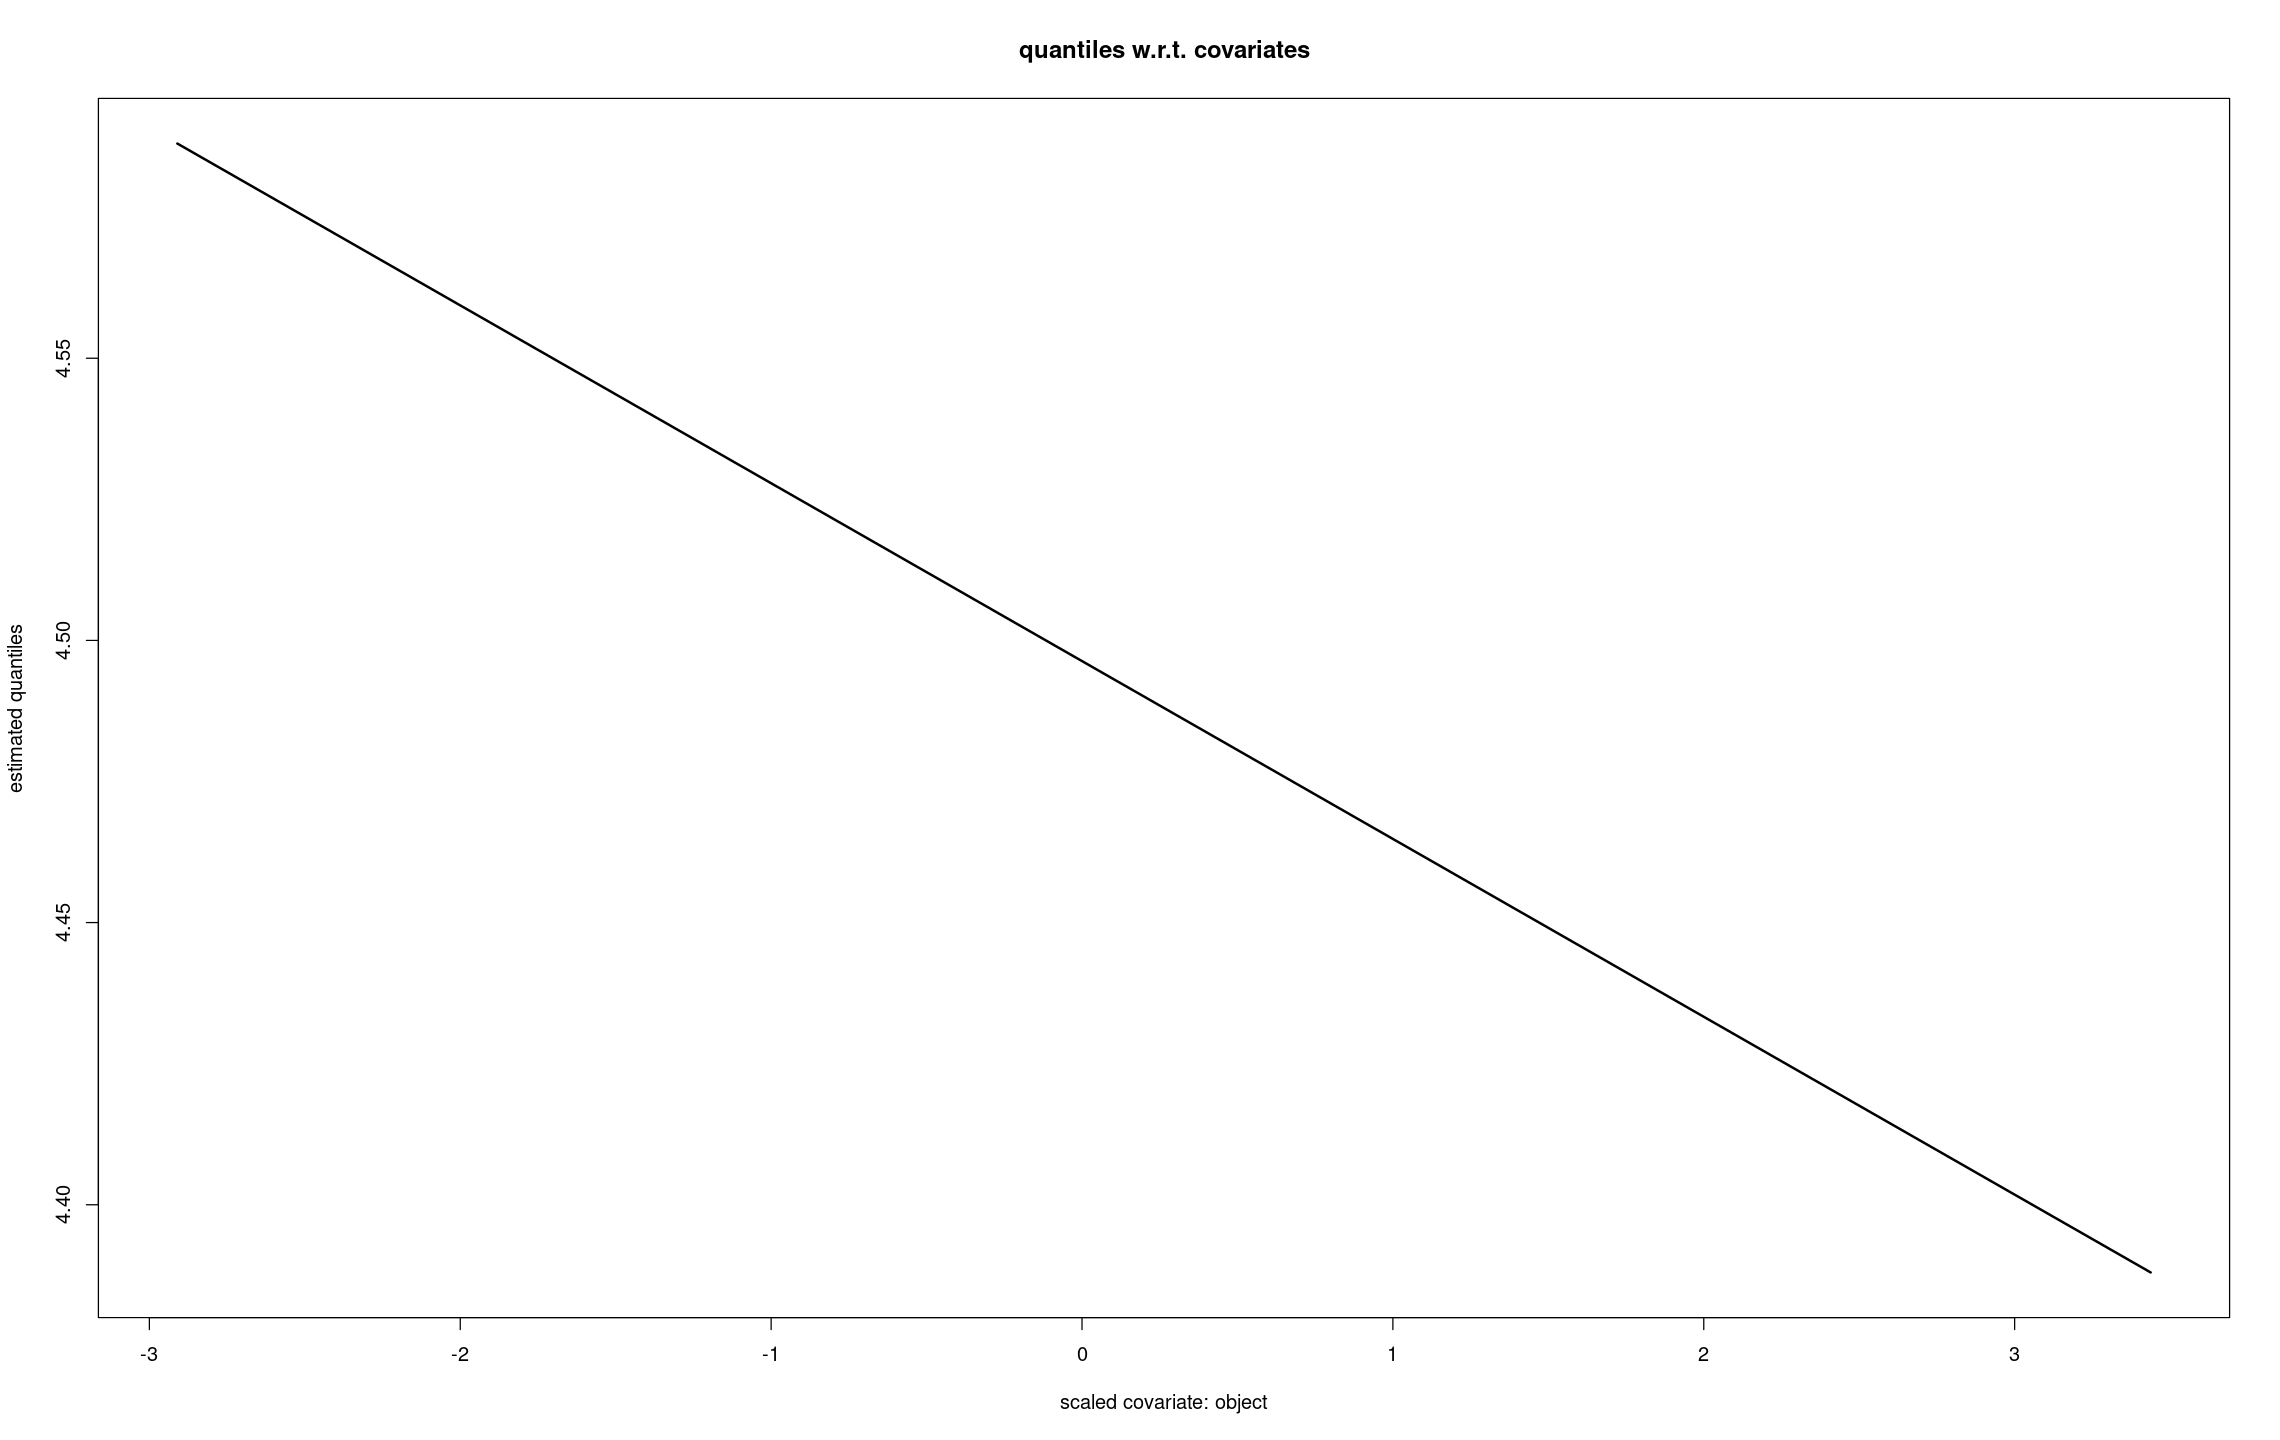

In [97]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = new_covariates_values[, selected_model_variable], 
        y = quantiles_new_covariates_values$estimate,
        type = "l",
        lty = 1,
        lwd = 2,
        main = "quantiles w.r.t. covariates",
        xlab = paste("scaled covariate:", selected_model_variable),
        ylab = "estimated quantiles")


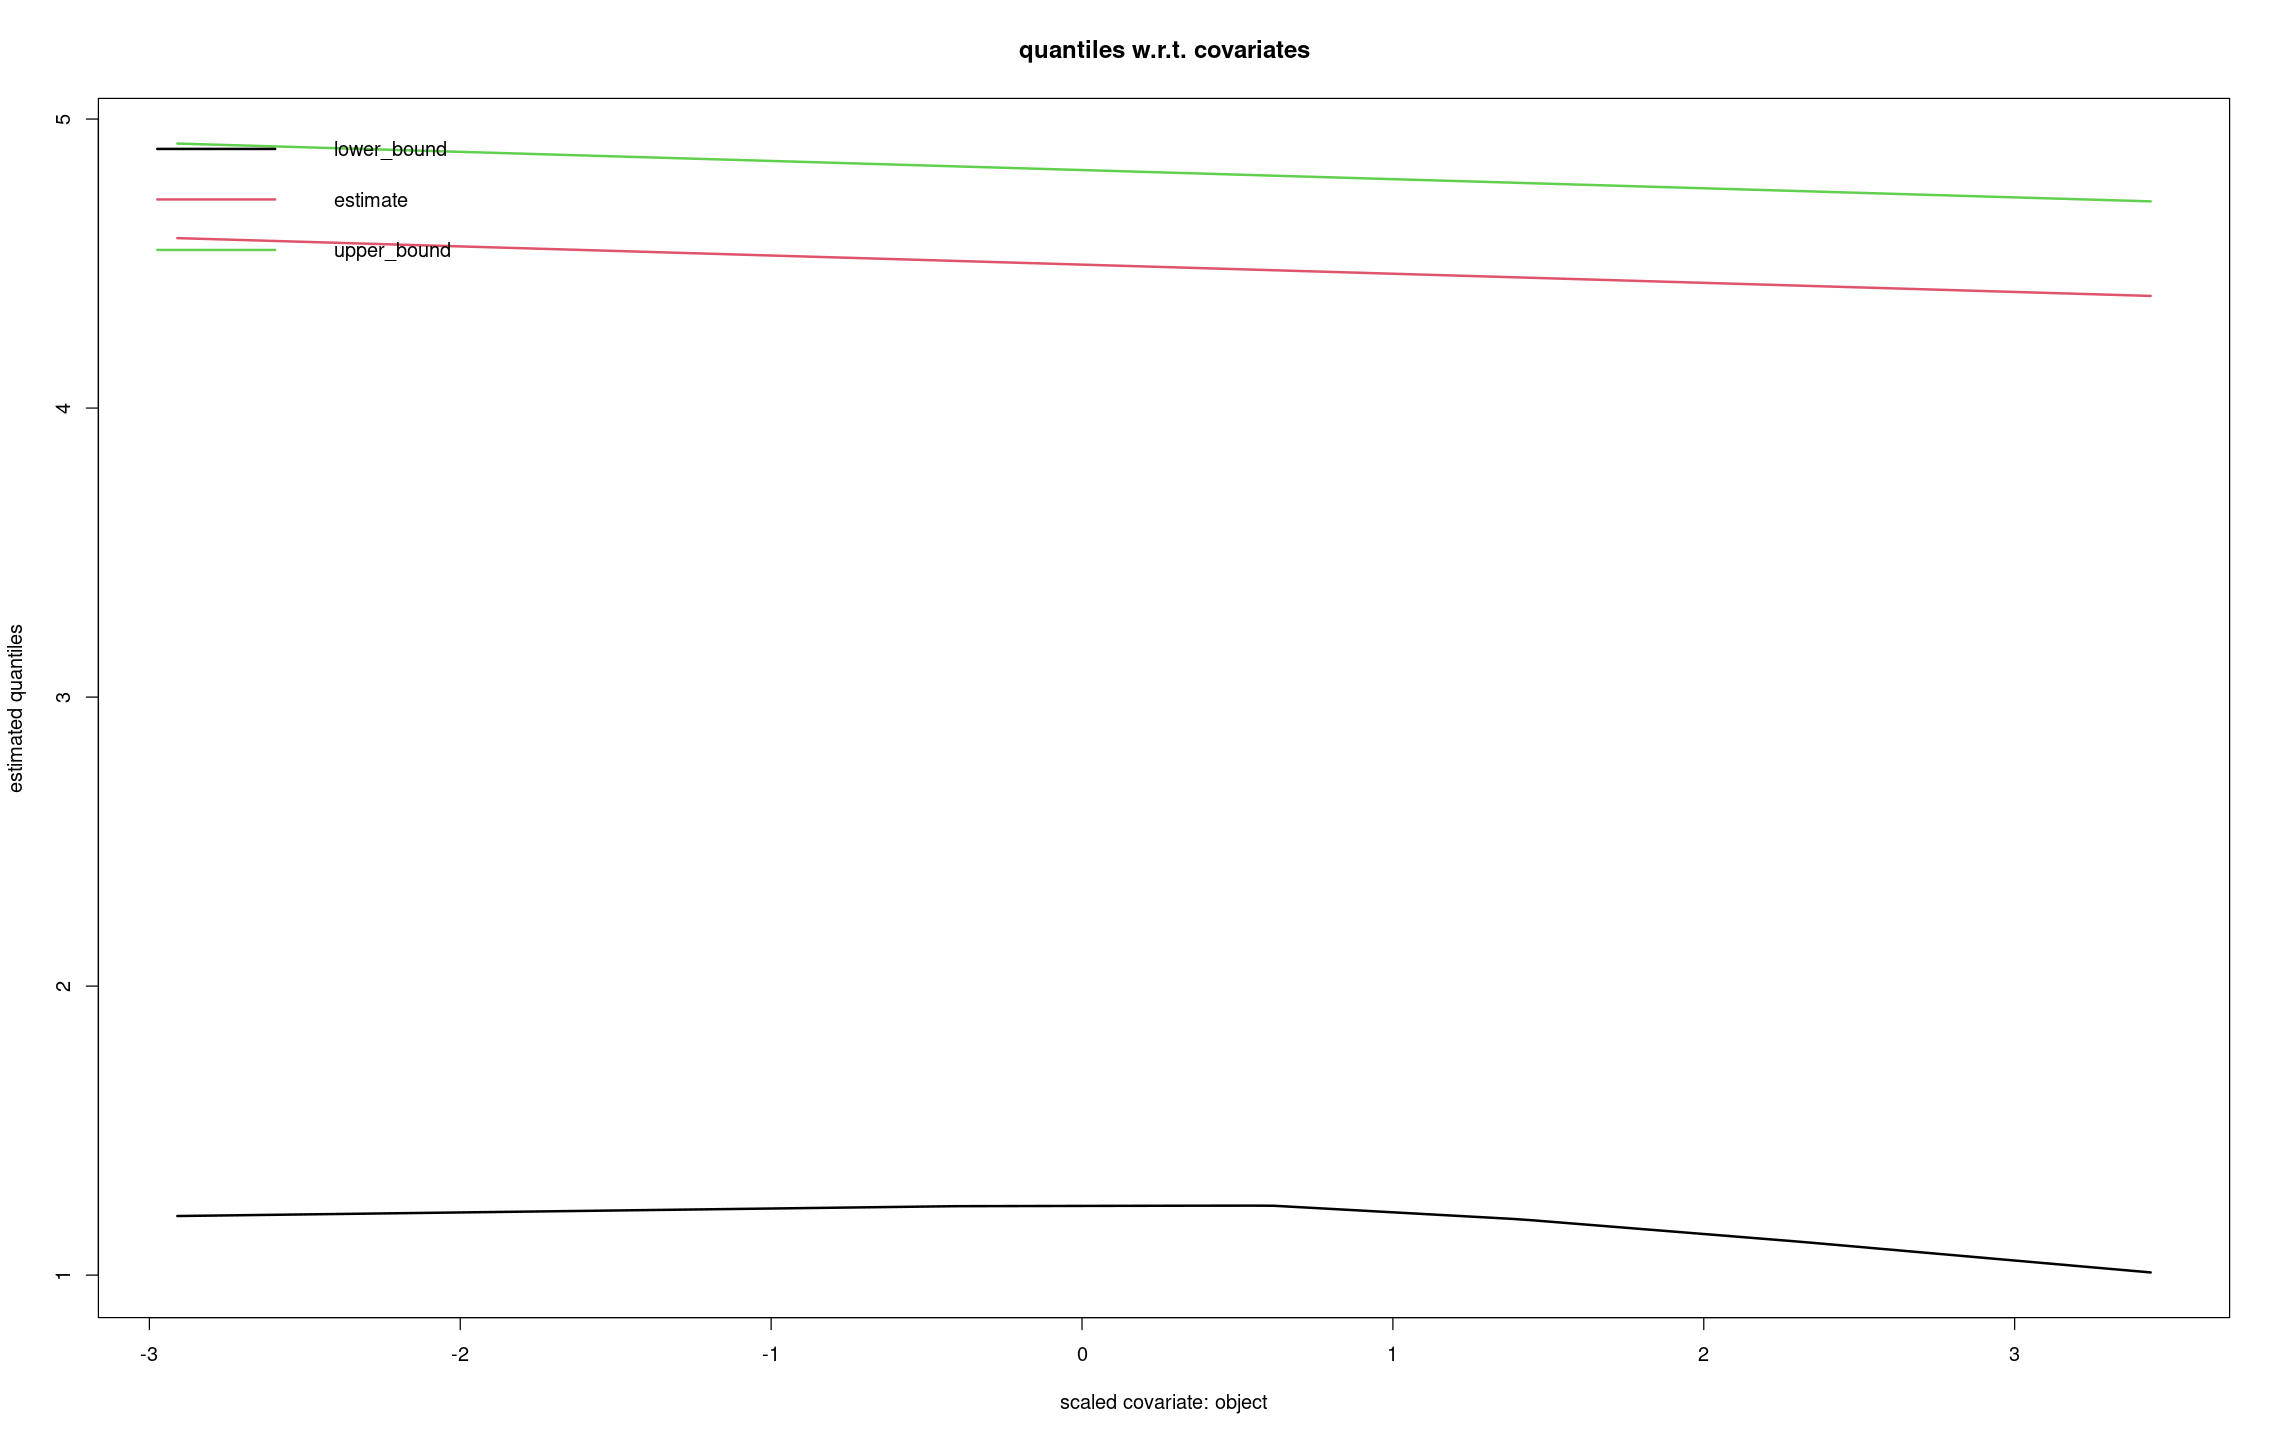

In [98]:
options(repr.plot.width=19, repr.plot.height=12)

matplot(x = new_covariates_values[, selected_model_variable], 
        y = quantiles_new_covariates_values,
        type = "l",
        lty = 1,
        lwd = 2,
        main = "quantiles w.r.t. covariates",
        xlab = paste("scaled covariate:", selected_model_variable),
        ylab = "estimated quantiles")

legend("topleft", legend = c("lower_bound", "estimate", "upper_bound"), col = 1:3, lty = 1, lwd = 2, horiz = FALSE, bty = "n")

## Custom quantile

In [99]:
true_quantile <- NULL

print(true_quantile)

NULL


In [107]:
custom_covariates_scaled <- data.frame("var" = 4)

names(custom_covariates_scaled) <- selected_model_variable

custom_covariates_scaled

object
<dbl>
4


In [108]:
several_ns_gev_models <- ns_gev_mixture_model_object$selected_full_ns_gev_models

predicted_parameters <- get_several_ns_gev_model_normalized_parameters(several_ns_gev_models = several_ns_gev_models,
                                                                       data = custom_covariates_scaled,
                                                                       use_extremal_index = TRUE,
                                                                       normalize_parameters = TRUE)

do.call(rbind, predicted_parameters)

,location,scale,shape
,<dbl>,<dbl>,<dbl>
2,0.05804659266,0.18279550278,0.1674218469
178,0.65756868660,0.19396880087,-0.4872727325
182,0.76944695127,0.09405606259,-0.4506776602
184,0.76450461112,0.10557938582,-0.4518760124
188,0.62268352893,0.21131876535,-0.4724606233
193,0.94050690095,0.07159903306,-0.5608628652
195,0.72115384521,0.10759041694,-0.4418898560
196,0.59207813565,0.19705754565,-0.4847749844
199,0.56698002757,0.20857807786,-0.4643652399


In [109]:
# index <- which.max(x)
# 
# new_data_covariates_scaled <- dplyr::slice(partial_data_covariates, index)
# 
# new_data_covariates_scaled |> select(all_of(selected_model_variable))

In [110]:
# several_ns_gev_models <- ns_gev_mixture_model_object$selected_full_ns_gev_models
# 
# predicted_parameters <- get_several_ns_gev_model_normalized_parameters(several_ns_gev_models = several_ns_gev_models,
#                                                                        data = new_data_covariates_scaled,
#                                                                        use_extremal_index = TRUE,
#                                                                        normalize_parameters = TRUE)
# 
# do.call(rbind, predicted_parameters)

In [112]:
results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                        alpha = alpha,
                                                                        data = custom_covariates_scaled,
                                                                        do.ci = FALSE,
                                                                        confidence_level = 0.95,
                                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                        iterations = 100)

results_geometric

Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning mes

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
2,4.6974786779,4.6974786779,4.6974786779
178,1.0524470896,1.0524470896,1.0524470896
182,0.9757409676,0.9757409676,0.9757409676
184,0.9955351890,0.9955351890,0.9955351890
188,1.0657610192,1.0657610192,1.0657610192
193,1.0676661282,1.0676661282,1.0676661282
195,0.9616005067,0.9616005067,0.9616005067
196,0.9952535754,0.9952535754,0.9952535754
199,1.0116290596,1.0116290596,1.0116290596


In [68]:
results_arithmetic <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                         alpha = alpha,
                                                                         data = custom_covariates_scaled,
                                                                         do.ci = TRUE,
                                                                         confidence_level = 0.95,
                                                                         kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                         iterations = 100)

results_arithmetic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
3,55.162579875,74.93070745,94.69883503
5,48.300661402,73.08906719,97.87747298
6,44.320987920,70.83888973,97.35679154
7,37.190871801,61.66693503,86.14299825
98,-8.481076174,32.25517306,72.99142229
101,-5.321961595,24.65052263,54.62300685
147,-15.872457361,30.99910811,77.87067358
152,-41.171068810,45.42980433,132.03067746
162,-63.041749859,60.58165019,184.20505024


In [69]:
results_harmonic <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                       alpha = alpha,
                                                                       data = custom_covariates_scaled,
                                                                       do.ci = TRUE,
                                                                       confidence_level = 0.95,
                                                                       kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                       iterations = 100)

results_harmonic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
3,55.162579875,74.93070745,94.69883503
5,48.300661402,73.08906719,97.87747298
6,44.320987920,70.83888973,97.35679154
7,37.190871801,61.66693503,86.14299825
98,-8.481076174,32.25517306,72.99142229
101,-5.321961595,24.65052263,54.62300685
147,-15.872457361,30.99910811,77.87067358
152,-41.171068810,45.42980433,132.03067746
162,-63.041749859,60.58165019,184.20505024


Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning mes

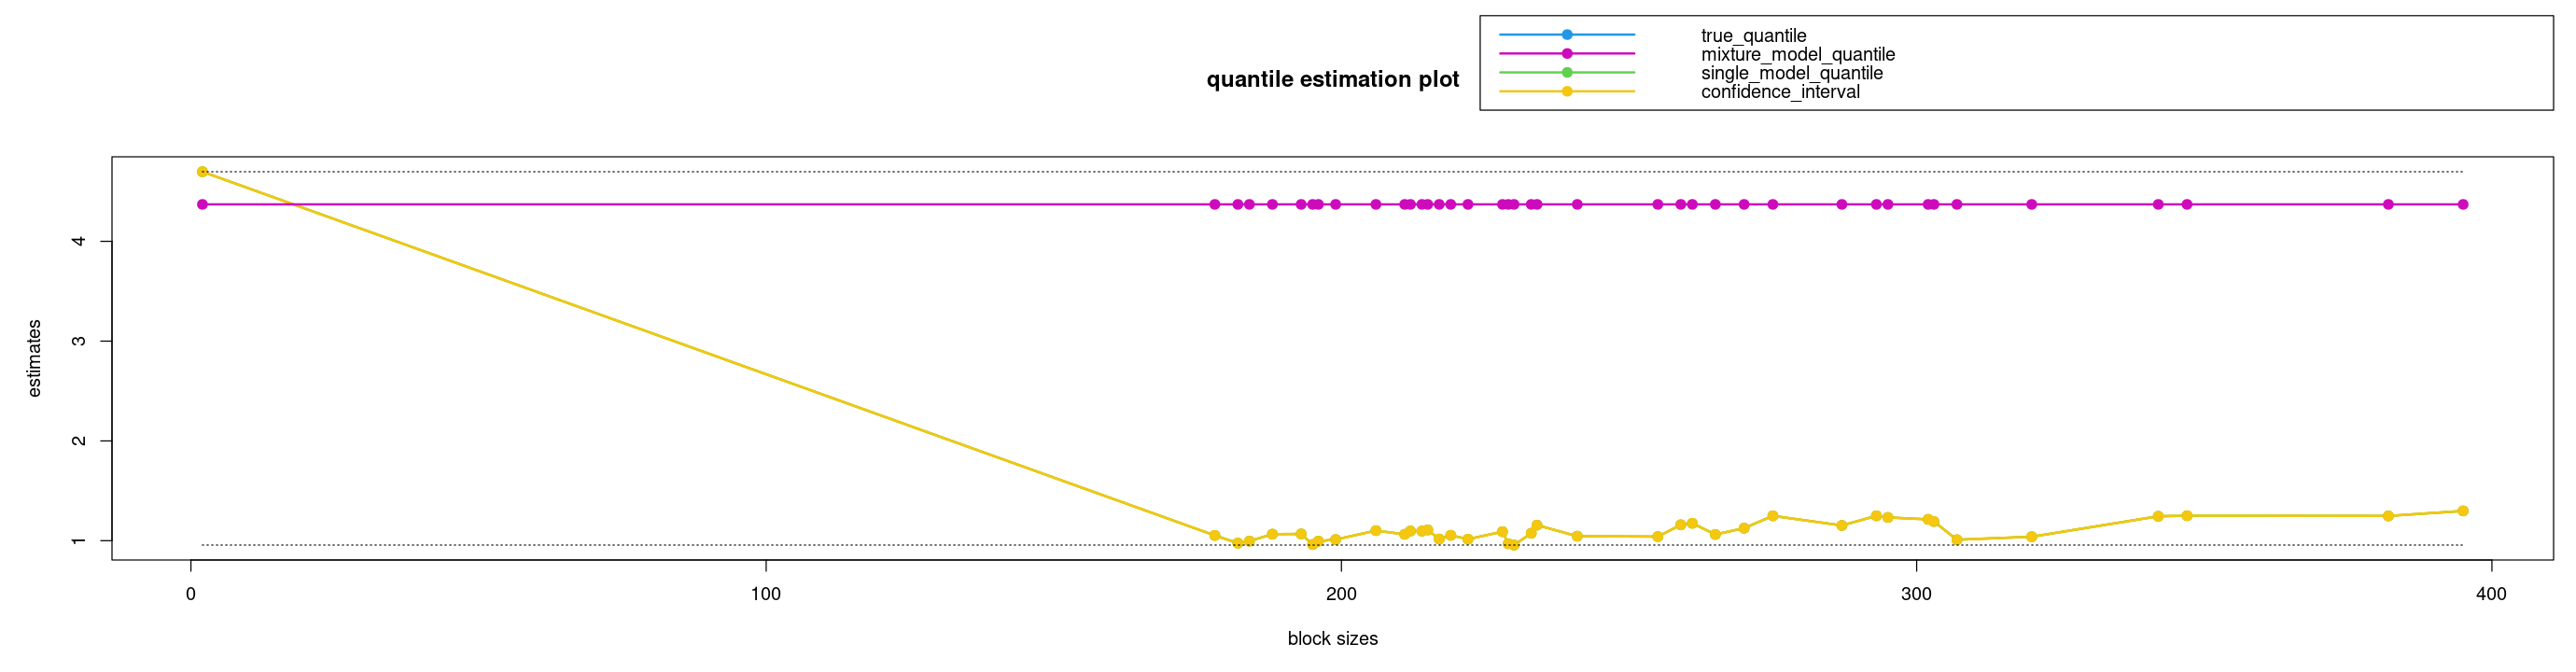

In [114]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                        alpha = alpha,
                                                        data = custom_covariates_scaled,
                                                        data_index = 1,
                                                        true_quantile = NULL,
                                                        do.ci = FALSE,
                                                        confidence_level = 0.95,
                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                        iterations = 100,
                                                        xlab = "block sizes",
                                                        ylab = "estimates",
                                                        main = "quantile estimation plot",
                                                        legend_position = "topright")


# Applications

## Estimation

## Diagnostic

## Prediction